Geothermal machine learning analysis: Southwest New Mexico 
---

This notebook is a part of the GeoThermalCloud.jl: Machine Learning framework for Geothermal Exploration.

<div style="text-align: left; padding-bottom: 30px;">
    <img src="../../logos/geothermalcloud-small.png" alt="geothermalcloud" width=25%  max-width=125px;/>
</div>

Machine learning analyses are performed using the **SmartTensors** machine learning framework.

<div style="text-align: left; padding-bottom: 30px;">
	<img src="../../logos/SmartTensorsNewSmaller.png" alt="SmartTensors" width=25%  max-width=125px;/>
</div>

This notebook demonstrates how the **NMFk** module of **SmartTensors** can be applied to perform unsupervised geothermal machine-learning analyses.

<div style="text-align: left; padding-bottom: 30px;">
	<img src="../../logos/nmfk-logo.png" alt="nmfk" width=25%  max-width=125px;/>
</div>

More information on how the ML results are interpreted to provide geothermal insights is discussed in <a href="https://github.com/SmartTensors/GeoThermalCloud.jl/blob/master/papers/SouthwestNM%20Paper.pdf" target="_blank">our research paper<a>.

## Introduction

Southwest New Mexico (**SWNM**) is a region important for geothermal exploration.

**SWNM** is broadly divided into four physiographic provinces: 
 - the Colorado Plateau
 - the Mogollon-Datil Volcanic Field (MDVF)
 - the Basin and Range, and
 - the Rio Grande rift.

Each of the **SWNM** physiographic provinces is associated with different types of unique hydrothermal systems with temperatures ranging from low (<90℃) to medium (90-150℃).

Some of the **SWNM** systems are already utilized for commercial and recreational purposes.

There are already energy-production facilities for both electricity and direct-use heating.

For example, the Basin and Range province has one geothermal power plant (Lightning dock) of gross ~14 MWe power, five greenhouse farms, and numerous medium-temperature wells and springs.
There are 14 spas and recreational facilities utilizing the **SWNM** geothermal resources. 

Recent Play Fairway Analysis (PFA) Phase I study of **SWNM** conducted at LANL revealed more potential geothermal resources.

The study area and the data collection locations are mapped below.

![SWNM study area](../map/SWNM_study_area.png)

## GeoThermalCloud installation

If **GeoThermalCloud** is not installed, first execute in the Julia REPL `import Pkg; Pkg.add("GeoThermalCloud"); import Pkg; Pkg.add("NMFk"); Pkg.add("Mads"); Pkg.add("DelimitedFiles"); Pkg.add("JLD"); Pkg.add("Gadfly");`.

In [2]:
import GeoThermalCloud
import NMFk
import Mads
import DelimitedFiles
import JLD
import Gadfly

Mads: Model Analysis & Decision Support
====

    ___      ____            ____    ____              ______
   /   \    /    \          /    |  |    \            /  __  \
  |     \  /     |         /     |  |     \          /  /  \__\
  |  |\  \/  /|  |        /      |  |      \        |  |
  |  | \    / |  |       /  /|   |  |   |\  \        \  \______.
  |  |  \__/  |  |      /  / |   |  |   | \  \        \_______  \
  |  |        |  |     /  /  |   |  |   |  \  \               \  \
  |  |        |  |    /  /===|   |  |   |___\  \    __.        |  |
  |  |        |  |   /  /    |   |  |           \   \  \______/  /
  |__|        |__|  /__/     |___|  |____________\   \__________/

MADS is an integrated high-performance computational framework for data- and model-based analyses.
MADS can perform: Sensitivity Analysis, Parameter Estimation, Model Inversion and Calibration, Uncertainty Quantification, Model Selection and Model Averaging, Model Reduction and Surrogate Modeling, Machine L

NMFk: Nonnegative Matrix Factorization + k-means clustering and physics constraints
====

  _     _   _      _   _______   _
 |  \  | | |  \  /  | |  _____| | |  _
 | . \ | | | . \/ . | | |___    | | / /
 | |\ \| | | |\  /| | |  ___|   | |/ /
 | | \ ' | | | \/ | | | |       |   (
 | |  \  | | |    | | | |       | |\ \
 |_|   \_| |_|    |_| |_|       |_| \_\

NMFk performs unsupervised machine learning based on matrix decomposition coupled with various constraints.
NMFk provides automatic identification of the optimal number of signals (features) present in two-dimensional data arrays (matrices).
NMFk offers visualization, pre-, and post-processing capabilities.


NTFk: Nonnegative Tensor Factorization + k-means clustering
====

  _     _   _________   _______   _
 |  \  | | |___   ___| |  _____| | |  _
 | . \ | |     | |     | |___    | | / /
 | |\ \| |     | |     |  ___|   | |/ /


 | | \ ' |     | |     | |       |   (
 | |  \  |     | |     | |       | |\ \
 |_|   \_|     |_|     |_|       |_| \_\

NTFk performs unsupervised machine learning based on tensor decomposition coupled with sparsity and nonnegativity constraints.
NTFk methodology allows for automatic identification of the optimal number of features (signals) present in multi-dimensional data arrays (tensors).
The number of features (tensor "rank") along different dimensions can be estimated jointly and independently.


[ Info: TensorLy is available


┌ Info: TensorLy is available
└ @ NTFk C:\Users\monty\.julia\dev\NTFk\src\NTFkTensorly.jl:8


## Load and pre-process the data

### Setup the working directory containing the SWNM data

In [3]:
cd(joinpath(GeoThermalCloud.dir, "SWNM"))

### Load the SWNM data file

In [4]:
d, h = DelimitedFiles.readdlm("data/Pepin_PCA_Input_Data_LANL.csv", ','; header=true);

### Define names of the data attributes (matrix columns)

In [5]:
attributes_short = ["Boron"; "Gravity"; "Magnetic"; "Dikes"; "Drainage"; "FaultInter"; "QuatFaults"; "Seismicity"; "NMFaults"; "Springs"; "Vents"; "Lithium"; "Precip"; "Air_Temp"; "Silica"; "Subcrop"; "WT_Gradient"; "WT_Elev"; "Heatflow"; "GS_Elev"; "DTW"; "Crst_Thick"; "Bsmt_Depth"]
attributes_long = uppercasefirst.(lowercase.(["Boron Concentration"; "Gravity Anomaly"; "Magnetic Intensity"; "Volcanic Dike Density"; "Drainage Density"; "Fault Intersection Density"; "Quaternary Fault Density"; "Seismicity"; "State Map Fault Density"; "Spring Density"; "Volcanic Vent Density"; "Lithium Concentration"; "Precipitation"; "Air Temperature"; "Silica Geothermometer"; "Subcrop Permeability"; "Hydraulic Gradient"; "Watertable Elevation"; "Heat flow"; "Groundsurface Elevation"; "Watertable Depth"; "Crustal Thickness"; "Depth to Basement"]))
attributes_long_new = uppercasefirst.(lowercase.(["Boron"; "Gravity anomaly"; "Magnetic intensity"; "Volcanic dike density"; "Drainage density"; "Fault intersection density"; "Quaternary fault density"; "Seismicity"; "State map fault density"; "Spring density"; "Volcanic vent density"; "Lithium"; "Precipitation"; "Air temperature"; "Silica geothermometer"; "Subcrop permeability"; "Hydraulic gradient"; "Watertable elevation"; "Heat flow"; "Groundsurface elevation"; "Watertable depth"; "Crustal thickness"; "Depth to basement"]))
attributes_ordered = ["Boron concentration", "Lithium concentration", "Drainage density", "Spring density", "Hydraulic gradient", "Precipitation", "Gravity anomaly", "Magnetic intensity", "Seismicity", "Silica geothermometer", "Heat flow", "Crustal thickness", "Depth to basement", "Fault intersection density", "Quaternary fault density", "State map fault density", "Volcanic dike density", "Volcanic vent density"];

Short attribute names are used for coding.

Long attribute names are used for plotting and visualization.

### Define attributes to remove from analysis

In [6]:
attributes_remove = uppercasefirst.(lowercase.(["Air Temperature"; "Subcrop Permeability"; "Watertable Elevation"; "Groundsurface Elevation"; "Watertable Depth"]));

### Define attributes for analysis

In [7]:
index_remove = indexin(attributes_remove, attributes_long)
attributes_cols = trues(length(attributes_long))
attributes_cols[index_remove] .= false
cols = vec(4:26)[attributes_cols]
attributes = attributes_long[cols .- 3];
print("Attributes used are:")
attributes

Attributes used are:

18-element Vector{String}:
 "Boron concentration"
 "Gravity anomaly"
 "Magnetic intensity"
 "Volcanic dike density"
 "Drainage density"
 "Fault intersection density"
 "Quaternary fault density"
 "Seismicity"
 "State map fault density"
 "Spring density"
 "Volcanic vent density"
 "Lithium concentration"
 "Precipitation"
 "Silica geothermometer"
 "Hydraulic gradient"
 "Heat flow"
 "Crustal thickness"
 "Depth to basement"

### Define names of the data locations

In [8]:
locations_short = ["Alamos spr";
"Allen spr";
"Apache well";
"Aragon spr";
"Ash spr";
"B.Iorio well";
"Cliff spr";
"Dent well";
"Derry spr";
"Faywood spr";
"Fed H1 well";
"Freiborn spr";
"Garton well";
"Gila spr 1";
"Gila spr 2";
"Goat spr";
"Jerry well";
"Kennecott well";
"Laguna Pbl";
"Lightning Dock";
"Los Alturas";
"Mangas spr";
"Mimbres spr";
"Ojitos spr";
"Ojo Caliente";
"Ojo Canas";
"Pueblo well";
"Radium spr";
"Rainbow spr";
"Riverside well";
"Sacred spr";
"Socorro Can";
"Spring";
"Spring Can";
"T or C spr";
"Turkey spr";
"Victoria well";
"Warm spr";
"Well 1";
"Well 2";
"Well 3";
"Well 4";
"Well 5";
"Carne well"]

locations_long = ["Alamos Spring";
"Allen Springs";
"Apache Tejo Warm Springs well";
"Aragon Springs";
"Ash Spring";
"B. Iorio 1 well";
"Cliff Warm Spring";
"Dent windmill well";
"Derry Warm Springs";
"Faywood Hot Springs";
"Federal H 1 well";
"Freiborn Canyon Spring";
"Garton well";
"Gila Hot Springs 1";
"Gila Hot Springs 2";
"Goat Camp Spring";
"Jerry well";
"Kennecott Warm Springs well";
"Laguna Pueblo";
"Lightning Dock";
"Los Alturas Estates";
"Mangas Springs";
"Mimbres Hot Springs";
"Ojitos Springs";
"Ojo Caliente";
"Ojo De las Canas";
"Pueblo windmill well";
"Radium Hot Springs";
"Rainbow Spring";
"Riverside Store well";
"Sacred Spring";
"Socorro Canyon";
"Spring";
"Spring Canyon Warm Spring";
"Truth or Consequences spring";
"Turkey Creek Spring";
"Victoria Land and Cattle Co. well";
"Warm Springs";
"Well 1";
"Well 2";
"Well 3";
"Well 4";
"Well 5";
"Well south of Carne"];

Short location names are used for coding.

Long location names are used for plotting and visualization.

### Define location coordinates

In [9]:
dindex = d[:,end] .== 1
rows = convert.(Int32, d[dindex,end-1])
locations = locations_short[rows]
lat = d[dindex, 2]
lon = d[dindex, 3];

### Set up directories to store obtained results and figures

In [10]:
figuredir = "figures-case01"
resultdir = "results-case01";

### Define a range for the number of signatures to be explored 

In [11]:
nkrange = 2:10;

### Define and normalize the data matrix

In [12]:
X = permutedims(d[dindex, cols])
Xu, nmin, nmax = NMFk.normalizematrix_row!(X);

## Perform ML analyses

The **NMFk** algorithm factorizes the normalized data matrix `Xu` into `W` and `H` matrices. For more information, check out the [**NMFk** website](https://github.com/SmartTensors/NMFk.jl)

In [13]:
W, H, fitquality, robustness, aic = NMFk.execute(Xu, nkrange, 1000; resultdir=resultdir, casefilename="nmfk", load=true)
W, H, fitquality, robustness, aic = NMFk.load(nkrange, 1000; resultdir=resultdir, casefilename="nmfk");

┌ Warning: Processed matrix size has more columns than rows (matrix size=(18, 44)). It is recommended in this case to use `clusterWmatrix == true`.
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkExecute.jl:34


Signals:  2 Fit:     32.70151 Silhouette:            1 AIC:    -2276.215 Signal order: [1, 2]


Signals:  3 Fit:      24.6022 Silhouette:    0.9999996 AIC:    -2377.607 Signal order: [1, 2, 3]
Signals:  4 Fit:     18.46274 Silhouette:    0.9999994 AIC:    -2480.975 Signal order: [2, 1, 4, 3]
Signals:  5 Fit:     14.74592 Silhouette:     0.764538 AIC:    -2535.007 Signal order: [1, 4, 2, 3, 5]
Signals:  6 Fit:      12.3538 Silhouette:   -0.1423047 AIC:    -2551.193 Signal order: [4, 2, 1, 6, 5, 3]
Signals:  7 Fit:     10.29325 Silhouette:   -0.0733191 AIC:    -2571.714 Signal order: [2, 3, 7, 5, 1, 6, 4]
Signals:  8 Fit:     8.237522 Silhouette:    0.2518114 AIC:    -2624.163 Signal order: [2, 4, 8, 5, 1, 3, 7, 6]
Signals:  9 Fit:     7.607165 Silhouette:  -0.07981342 AIC:    -2563.213 Signal order: [1, 8, 9, 4, 7, 2, 5, 3, 6]
Signals: 10 Fit:     6.023938 Silhouette:   0.02130362 AIC:    -2624.026 Signal order: [3, 2, 9, 5, 8, 10, 1, 7, 4, 6]
Signals:  2 Fit:     32.70151 Silhouette:            1 AIC:    -2276.215
Signals:  3 Fit:      24.6022 Silhouette:    0.9999996 AIC:    -23

┌ Warning: Processed matrix size has more columns than rows (matrix size=(18, 44)). It is recommended in this case to use `clusterWmatrix == true`.
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkExecute.jl:34
┌ Warning: Processed matrix size has more columns than rows (matrix size=(18, 44)). It is recommended in this case to use `clusterWmatrix == true`.
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkExecute.jl:34
┌ Warning: Processed matrix size has more columns than rows (matrix size=(18, 44)). It is recommended in this case to use `clusterWmatrix == true`.
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkExecute.jl:34
┌ Warning: Processed matrix size has more columns than rows (matrix size=(18, 44)). It is recommended in this case to use `clusterWmatrix == true`.
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkExecute.jl:34
┌ Warning: Processed matrix size has more columns than rows (matrix size=(18, 44)). It is recommended in this case to use `clusterWmatrix == true`.
└ @ NMFk C:\

Signals:  2 Fit:     32.70151 Silhouette:            1 AIC:    -2276.215 Signal order: [1, 2]


┌ Info: Optimal solution: 5 signals
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkExecute.jl:23


Signals:  3 Fit:      24.6022 Silhouette:    0.9999996 AIC:    -2377.607 Signal order: [1, 2, 3]
Signals:  4 Fit:     18.46274 Silhouette:    0.9999994 AIC:    -2480.975 Signal order: [2, 1, 4, 3]
Signals:  5 Fit:     14.74592 Silhouette:     0.764538 AIC:    -2535.007 Signal order: [1, 4, 2, 3, 5]
Signals:  6 Fit:      12.3538 Silhouette:   -0.1423047 AIC:    -2551.193 Signal order: [4, 2, 1, 6, 5, 3]
Signals:  7 Fit:     10.29325 Silhouette:   -0.0733191 AIC:    -2571.714 Signal order: [2, 3, 7, 5, 1, 6, 4]
Signals:  8 Fit:     8.237522 Silhouette:    0.2518114 AIC:    -2624.163 Signal order: [2, 4, 8, 5, 1, 3, 7, 6]
Signals:  9 Fit:     7.607165 Silhouette:  -0.07981342 AIC:    -2563.213 Signal order: [1, 8, 9, 4, 7, 2, 5, 3, 6]
Signals: 10 Fit:     6.023938 Silhouette:   0.02130362 AIC:    -2624.026 Signal order: [3, 2, 9, 5, 8, 10, 1, 7, 4, 6]


┌ Info: Optimal solution: 5 signals
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkIO.jl:31


Here, the **NMFk** results are loaded from a prior ML run.

As seen from the output above, the NMFk analyses identified that the optimal number of geothermal signatures in the dataset **5**.
This estimate is based on a criterion that `Silhouette` (`robustness`) of the acceptable solutions is >0.5.
However, if a criterion for `Silhouette` is >0.25, the optimal number of signatures is **8**.

It is important to note that our ML methodology can be applied to perform both **classification** and **regression** analyses.

For the case of **regression** (predictive) analyses, the optimal number of signatures is **5**.

Solutions with a number of signatures less than **5** are underfitting.

Solutions with a number of signatures greater than **5** are overfitting and unacceptable.

The solution for `k=8` is also analyzed below because it provides further refinements in the extracted geothermal signatures.
It also provides further demonstration of the **classification** capabilities of our ML methodology.

The set of acceptable solutions are defined by the **NMFk** algorithm as follows:

In [14]:
NMFk.getks(nkrange, robustness[nkrange], 0.5)

4-element Vector{Int64}:
 2
 3
 4
 5

The acceptable solutions contain 2, 3, 4, and 5 signatures.

### Post-process NMFk results

#### Number of signatures

Below is a plot representing solution quality (fit) and silhouette width (robustness) for different numbers of signatures `k`:

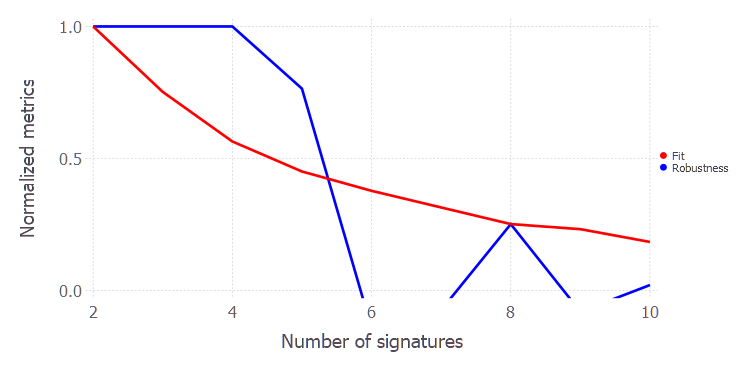

In [15]:
NMFk.plot_signal_selecton(nkrange, fitquality, robustness; figuredir=figuredir, xtitle="Number of signatures")

The plot above also demonstrates that the acceptable solutions contain 2, 3, 4, and 5 signatures. 

#### Analysis of all the acceptable solutions 

The ML solutions containing an acceptable number of signatures are further analyzed as follows:

┌ Info: Number of signals: 2
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:280
┌ Info: Locations (signals=2)
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:284


┌ Warning: type Clustering.KmeansResult{Core.Array{Core.Float64,2},Core.Float64,Core.Int64} not present in workspace; reconstructing
└ @ JLD C:\Users\monty\.julia\packages\JLD\9wjVw\src\jld_types.jl:697


┌ Info: Robust k-means analysis results are loaded from file results-case01\Hmatrix-2-2_44-1000.jld!
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkCluster.jl:71


┌ Warning: Procedure to find unique signals could not identify a solution ...
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkCluster.jl:172
┌ Warning: Procedure to find unique signals could not identify a solution ...
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkCluster.jl:172
┌ Warning: type Clustering.KmeansResult{Core.Array{Core.Float64,2},Core.Float64,Core.Int64} not present in workspace; reconstructing
└ @ JLD C:\Users\monty\.julia\packages\JLD\9wjVw\src\jld_types.jl:697


┌ Info: Robust k-means analysis results are loaded from file results-case01\Wmatrix-2-2_18-1000.jld!
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkCluster.jl:71


29×2 Matrix{Any}:
 "Allen spr"       1.0
 "Turkey spr"      0.884139
 "Aragon spr"      0.849368
 "Gila spr 1"      0.845807
 "Ash spr"         0.839107
 "Gila spr 2"      0.829838
 "Garton well"     0.788626
 "Mimbres spr"     0.7852
 "Ojitos spr"      0.76979
 "Socorro Can"     0.761215
 ⋮                 
 "Spring"          0.669871
 "Alamos spr"      0.64752
 "Pueblo well"     0.63547
 "Rainbow spr"     0.635234
 "Jerry well"      0.622338
 "Laguna Pbl"      0.601675
 "Sacred spr"      0.597838
 "Apache well"     0.563514
 "Kennecott well"  0.510178

┌ Info: Signal A -> A Count: 29
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:400
┌ Info: Signal B -> B Count: 15
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:400


15×2 Matrix{Any}:
 "Fed H1 well"     1.0
 "Well 4"          0.840281
 "Well 2"          0.78384
 "Well 5"          0.719246
 "Los Alturas"     0.692025
 "Radium spr"      0.687742
 "Lightning Dock"  0.677317
 "T or C spr"      0.60486
 "Carne well"      0.592351
 "Well 3"          0.56113
 "B.Iorio well"    0.480433
 "Victoria well"   0.462937
 "Derry spr"       0.400573
 "Faywood spr"     0.391769
 "Goat spr"        0.354929

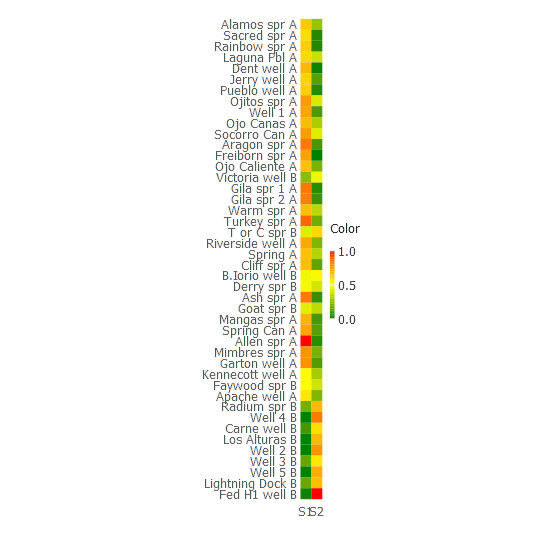

┌ Info: Signal A (S1) (k-means clustering)
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:417
┌ Info: Signal B (S2) (k-means clustering)
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:417


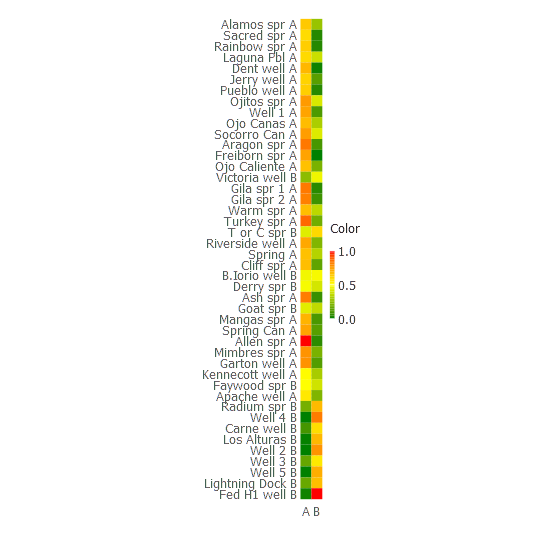

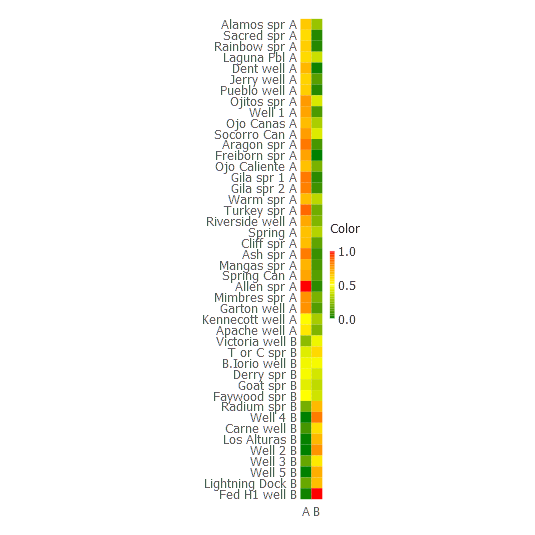

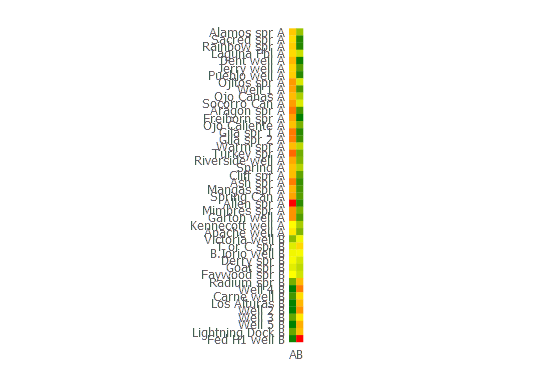

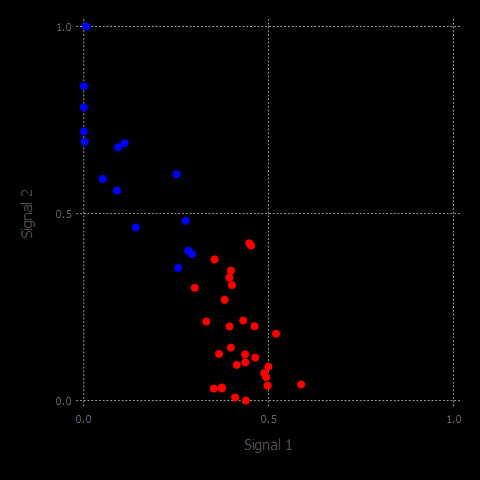

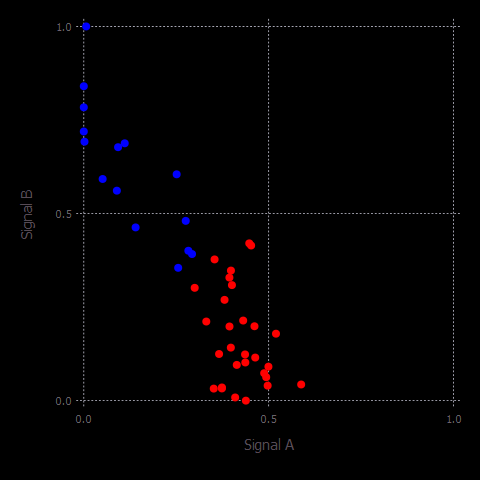

11×2 Matrix{Any}:
 "Drainage density"            1.0
 "Lithium concentration"       0.801888
 "Crustal thickness"           0.684456
 "Magnetic intensity"          0.581662
 "State map fault density"     0.539332
 "Boron concentration"         0.431691
 "Volcanic dike density"       0.334325
 "Heat flow"                   0.283606
 "Seismicity"                  0.13724
 "Gravity anomaly"             0.126086
 "Fault intersection density"  0.097643

7×2 Matrix{Any}:
 "Silica geothermometer"     0.690981
 "Quaternary fault density"  0.664186
 "Depth to basement"         0.61722
 "Volcanic vent density"     0.334398
 "Spring density"            0.108699
 "Hydraulic gradient"        0.0811159
 "Precipitation"             0.0

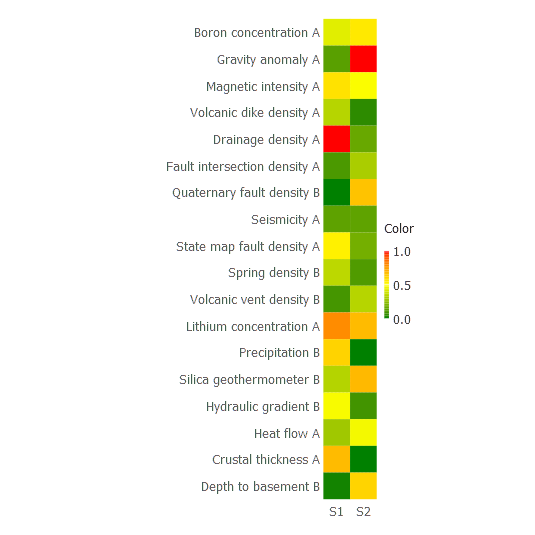

┌ Info: Attributes (signals=2)
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:481
┌ Info: Signal A (S1) Count: 11
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:494
┌ Info: Signal B (S2) Count: 7
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:494
┌ Info: Signal A -> A Count: 11
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:504
┌ Info: Signal B -> B Count: 7
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:504
┌ Info: Signal A (remapped k-means clustering)
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:519


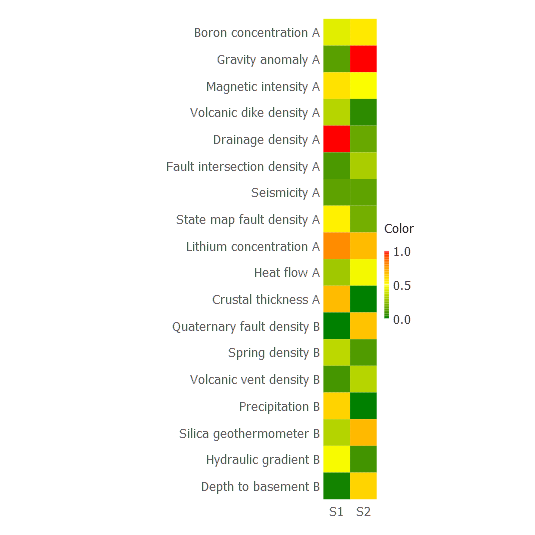

┌ Info: Signal B (remapped k-means clustering)
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:519


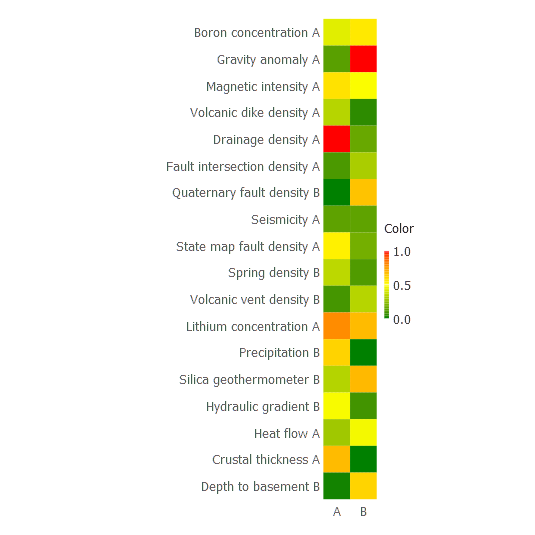

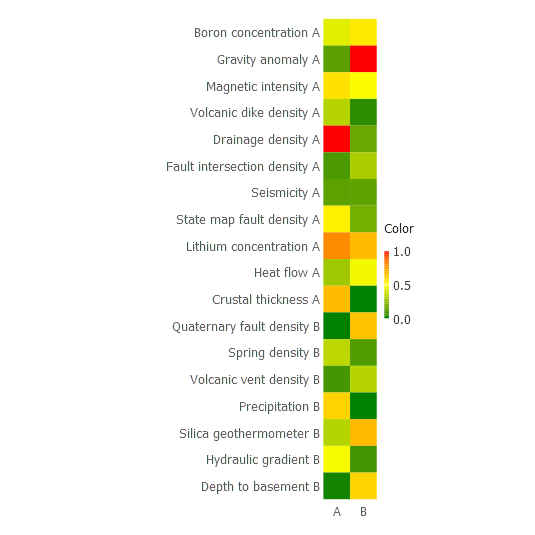

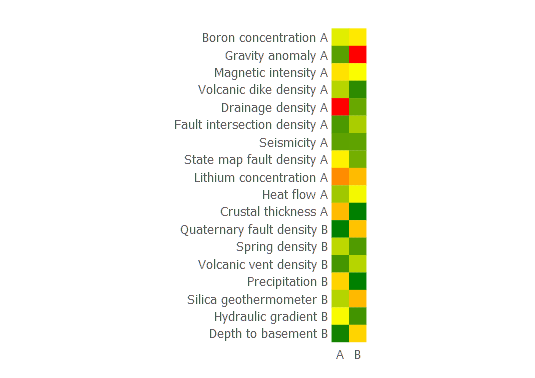

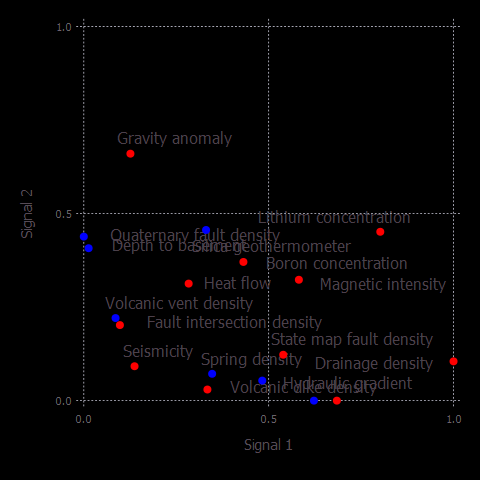

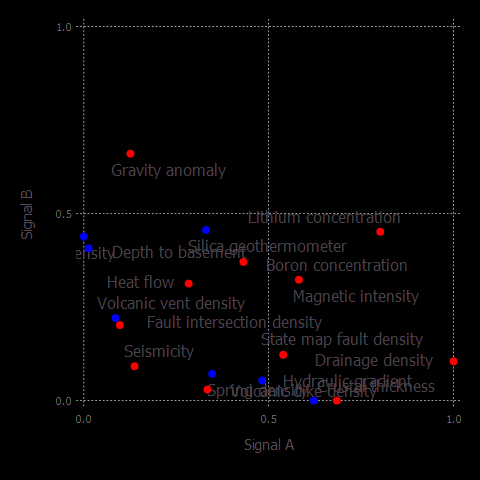

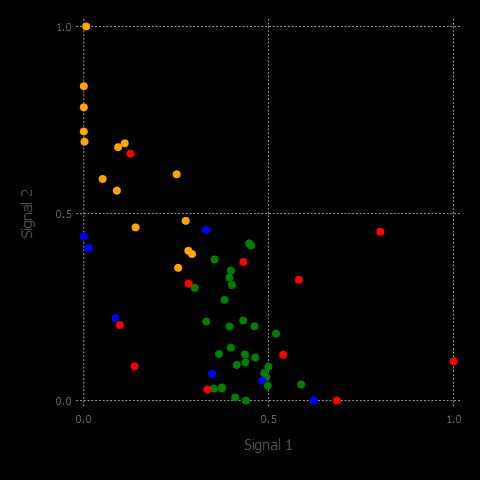

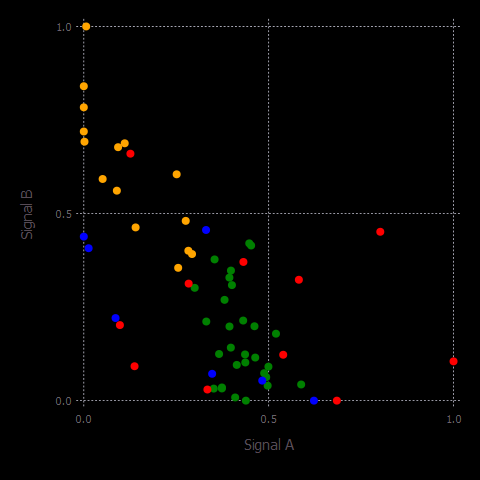

┌ Info: Number of signals: 3
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:280
┌ Info: Locations (signals=3)
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:284
┌ Warning: type Clustering.KmeansResult{Core.Array{Core.Float64,2},Core.Float64,Core.Int64} not present in workspace; reconstructing
└ @ JLD C:\Users\monty\.julia\packages\JLD\9wjVw\src\jld_types.jl:697


┌ Info: Robust k-means analysis results are loaded from file results-case01\Hmatrix-3-3_44-1000.jld!
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkCluster.jl:71
┌ Warning: Procedure to find unique signals could not identify a solution ...
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkCluster.jl:172
┌ Warning: Procedure to find unique signals could not identify a solution ...
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkCluster.jl:172
┌ Warning: Procedure to find unique signals could not identify a solution ...
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkCluster.jl:172
┌ Warning: type Clustering.KmeansResult{Core.Array{Core.Float64,2},Core.Float64,Core.Int64} not present in workspace; reconstructing
└ @ JLD C:\Users\monty\.julia\packages\JLD\9wjVw\src\jld_types.jl:697


23×2 Matrix{Any}:
 "Allen spr"       1.0
 "Turkey spr"      0.916375
 "Ash spr"         0.86
 "Gila spr 2"      0.81917
 "Garton well"     0.814428
 "Mimbres spr"     0.810983
 "Gila spr 1"      0.804735
 "Aragon spr"      0.760672
 "Spring Can"      0.74146
 "Riverside well"  0.729138
 ⋮                 
 "Cliff spr"       0.681147
 "Dent well"       0.67989
 "Ojo Caliente"    0.678069
 "Pueblo well"     0.624881
 "Rainbow spr"     0.623511
 "Jerry well"      0.59157
 "Apache well"     0.58789
 "Sacred spr"      0.586264
 "Kennecott well"  0.545995

13×2 Matrix{Any}:
 "Fed H1 well"     1.0
 "Well 4"          0.821925
 "Well 5"          0.773654
 "Los Alturas"     0.773565
 "Well 2"          0.752558
 "Lightning Dock"  0.71038
 "Radium spr"      0.671286
 "Carne well"      0.644475
 "Well 3"          0.610426
 "Victoria well"   0.492095
 "Faywood spr"     0.385637
 "Goat spr"        0.341865
 "Derry spr"       0.336225

8×2 Matrix{Any}:
 "Socorro Can"   1.0
 "Ojitos spr"    0.902801
 "Ojo Canas"     0.734799
 "T or C spr"    0.443392
 "B.Iorio well"  0.437021
 "Laguna Pbl"    0.288994
 "Warm spr"      0.177227
 "Alamos spr"    0.139853

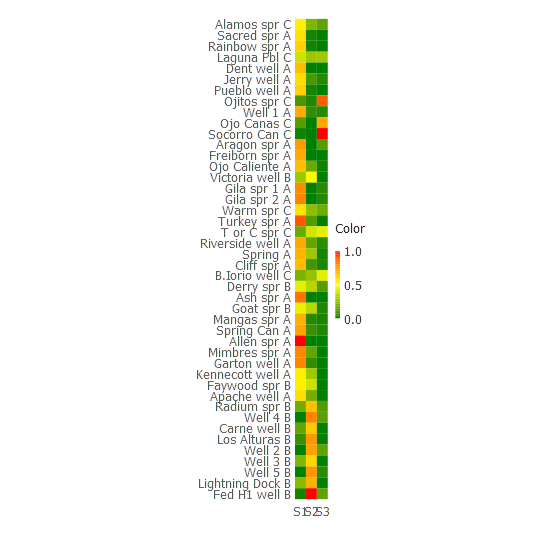

┌ Info: Robust k-means analysis results are loaded from file results-case01\Wmatrix-3-3_18-1000.jld!
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkCluster.jl:71
┌ Warning: Procedure to find unique signals could not identify a solution ...
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkCluster.jl:172
┌ Info: Signal A -> A Count: 23
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:400
┌ Info: Signal B -> B Count: 13
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:400
┌ Info: Signal C -> C Count: 8
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:400
┌ Info: Signal A (S1) (k-means clustering)
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:417
┌ Info: Signal B (S2) (k-means clustering)
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:417
┌ Info: Signal C (S3) (k-means clustering)
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:417


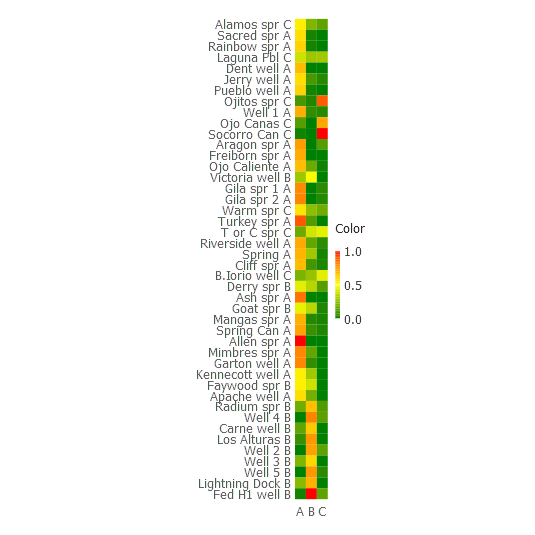

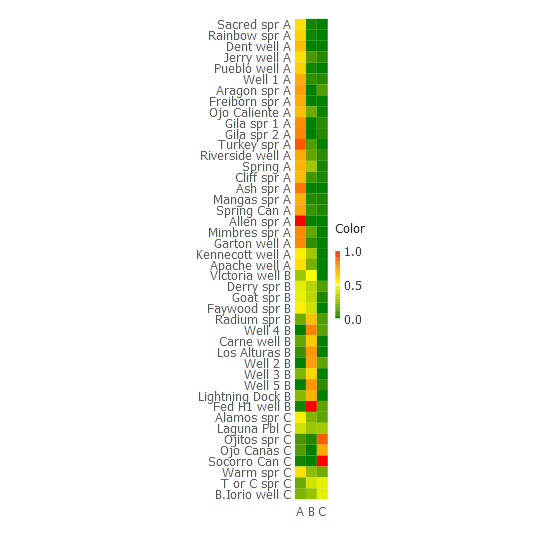

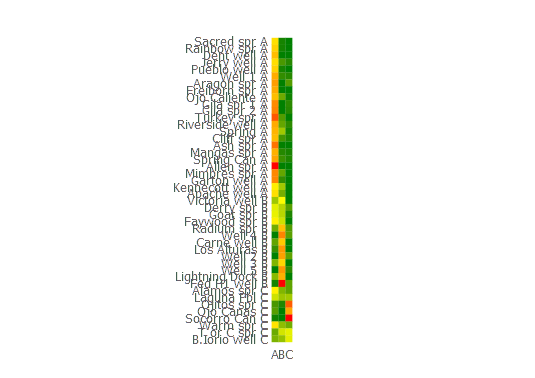

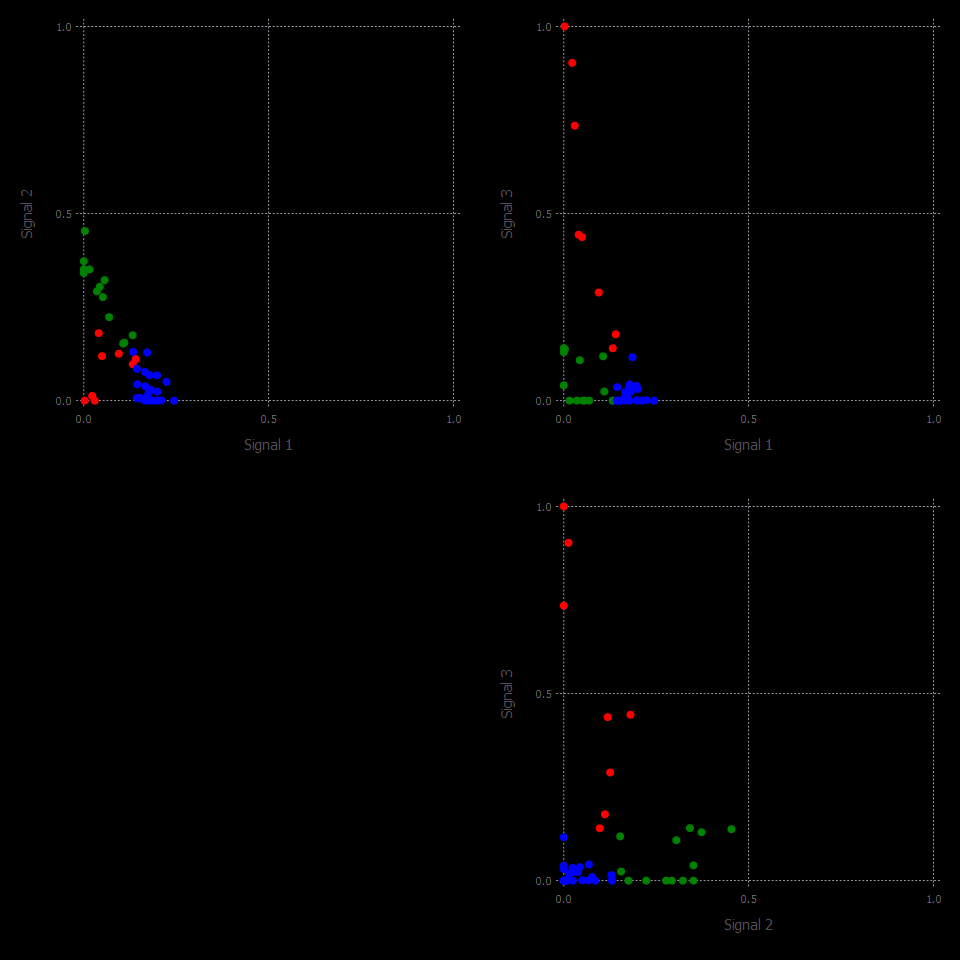

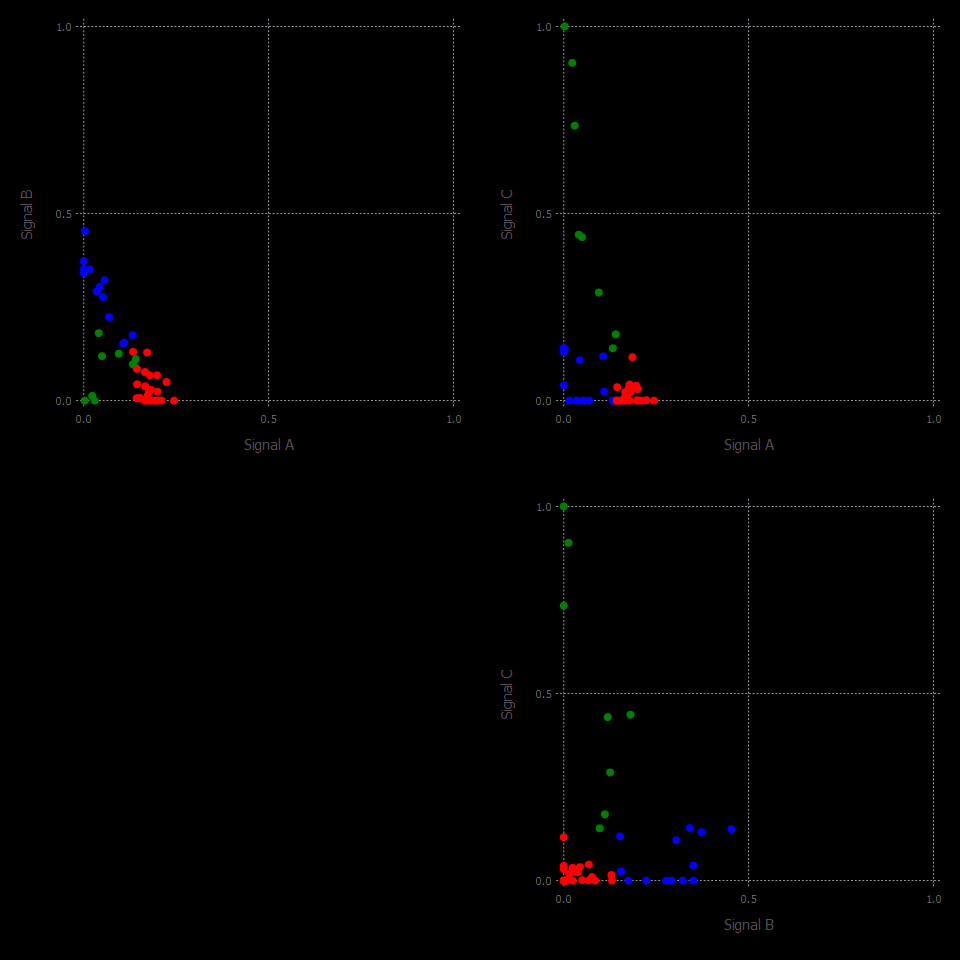

3×2 Matrix{Any}:
 "State map fault density"  0.496198
 "Hydraulic gradient"       0.469537
 "Silica geothermometer"    0.439841

6×2 Matrix{Any}:
 "Depth to basement"         0.676939
 "Boron concentration"       0.511079
 "Quaternary fault density"  0.460437
 "Volcanic vent density"     0.27834
 "Spring density"            0.0
 "Precipitation"             0.0

9×2 Matrix{Any}:
 "Fault intersection density"  1.0
 "Seismicity"                  0.967935
 "Drainage density"            0.952827
 "Lithium concentration"       0.858236
 "Magnetic intensity"          0.403114
 "Crustal thickness"           0.346896
 "Gravity anomaly"             0.297228
 "Heat flow"                   0.290886
 "Volcanic dike density"       0.28542

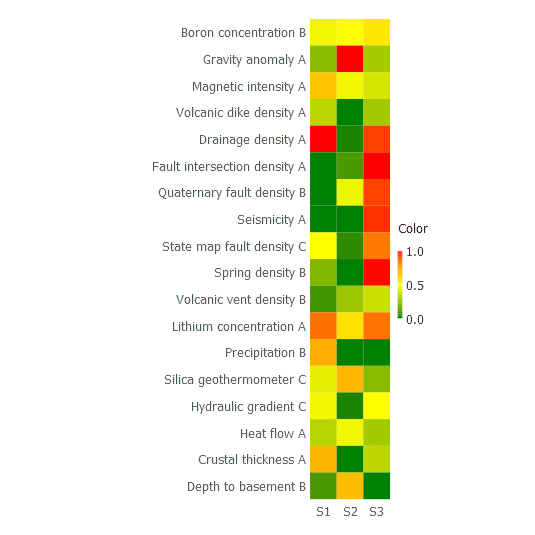

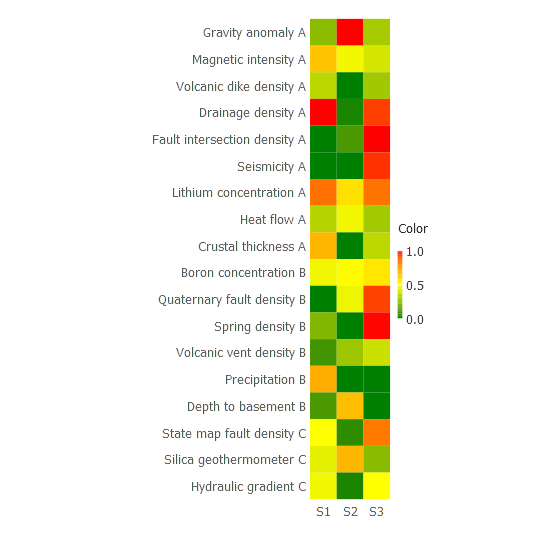

┌ Info: Attributes (signals=3)
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:481
┌ Info: Signal A (S3) Count: 9
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:494
┌ Info: Signal B (S2) Count: 6
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:494
┌ Info: Signal C (S1) Count: 3
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:494
┌ Info: Signal C -> A Count: 3
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:504
┌ Info: Signal B -> B Count: 6
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:504
┌ Info: Signal A -> C Count: 9
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:504
┌ Info: Signal A (remapped k-means clustering)
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:519
┌ Info: Signal B (remapped k-means clustering)
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:519
┌ Info: Signal C (remapped k-means clustering)
└ @ NMFk C:\Users\monty\.julia\dev\NMFk

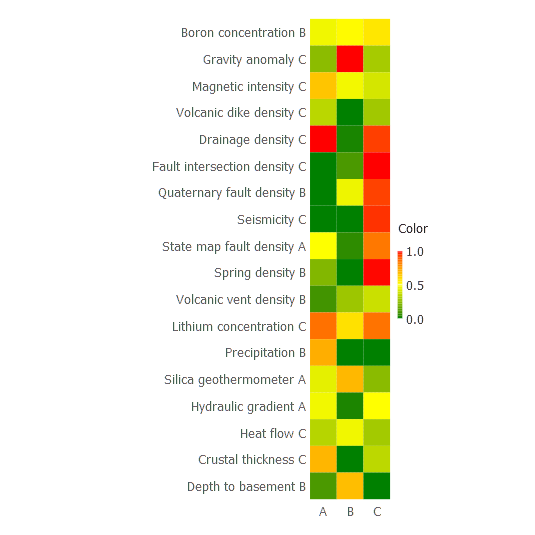

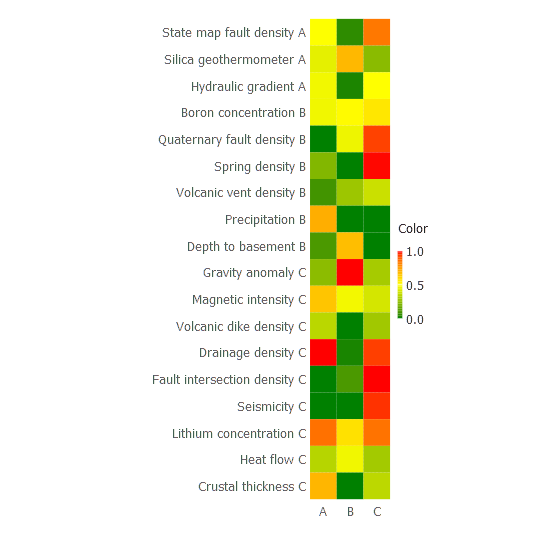

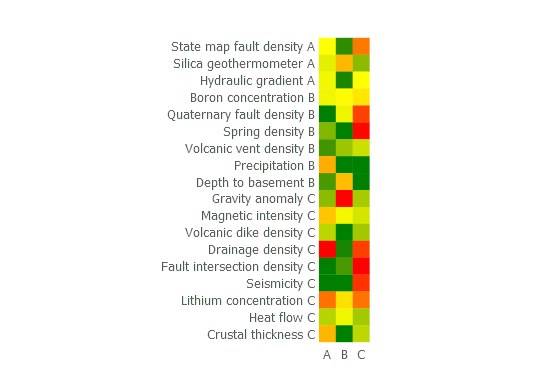

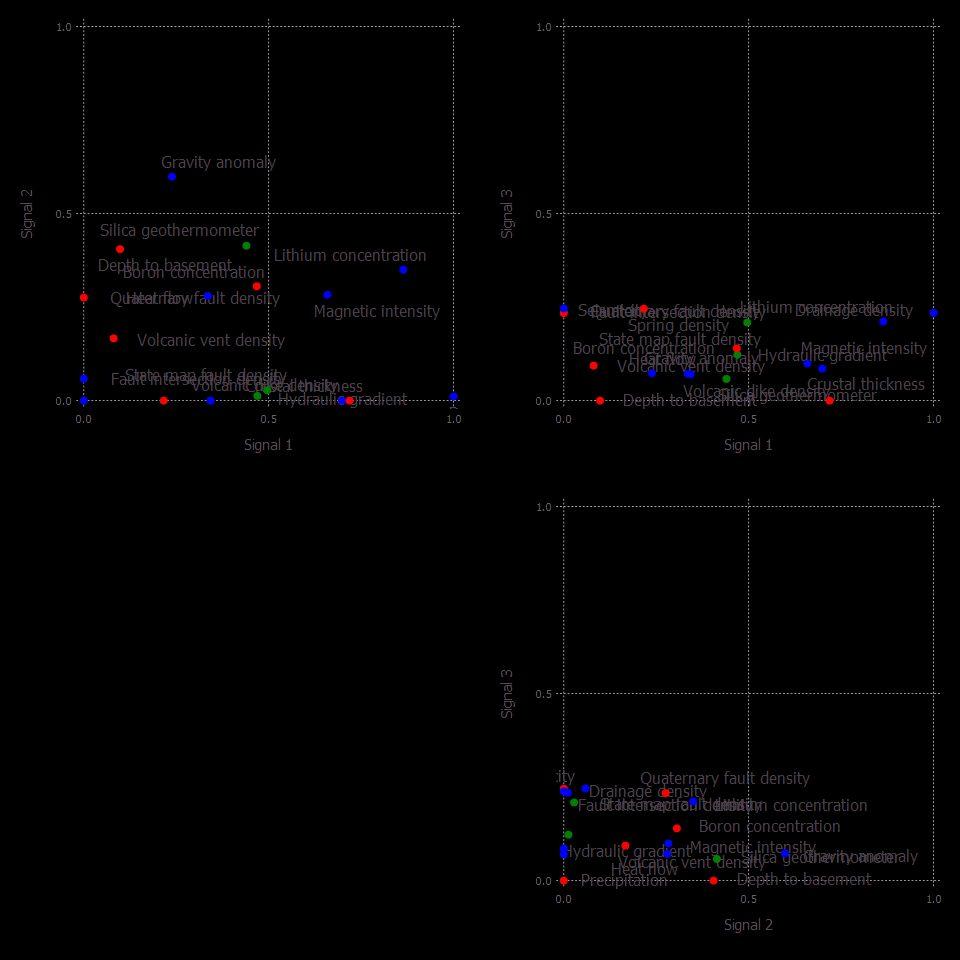

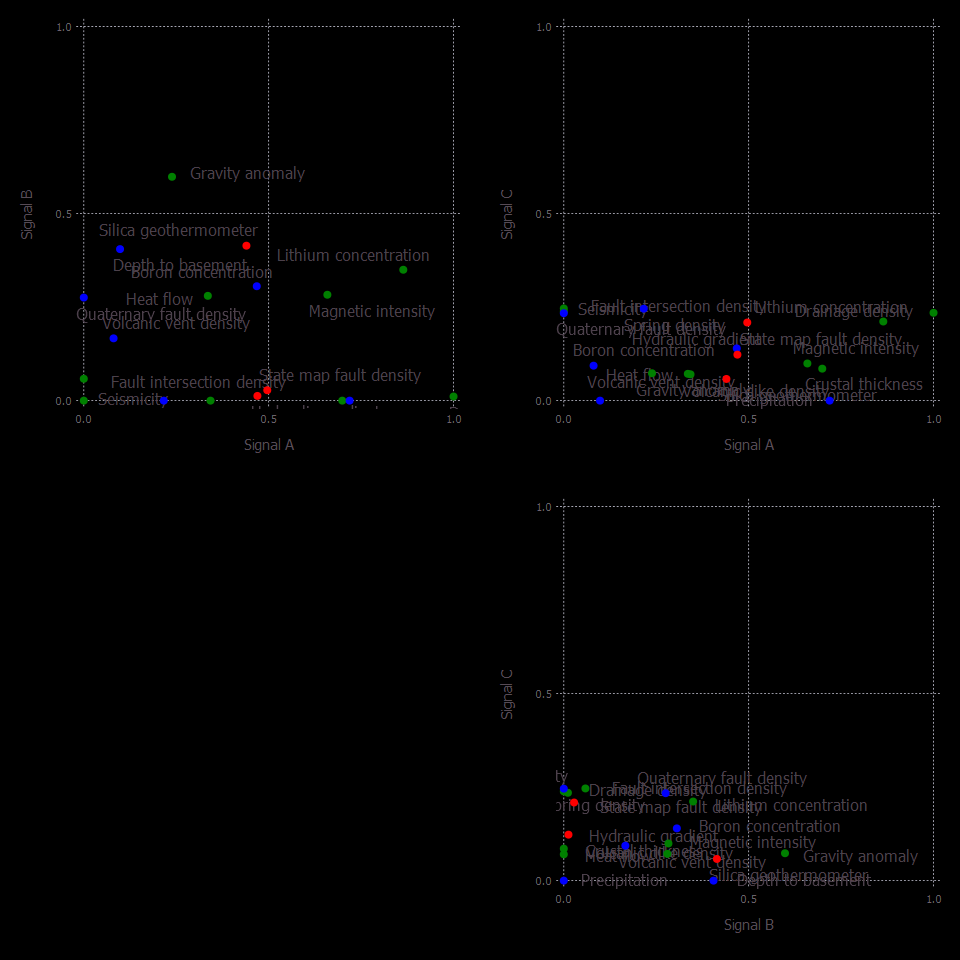

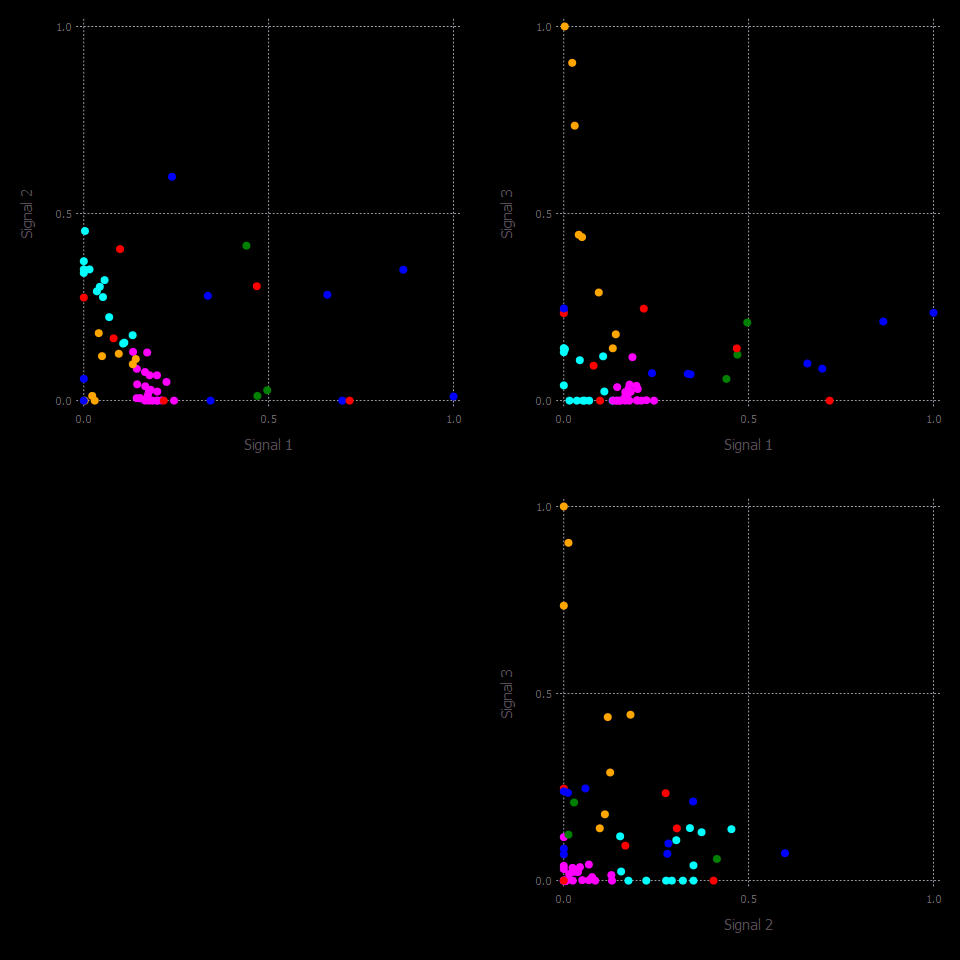

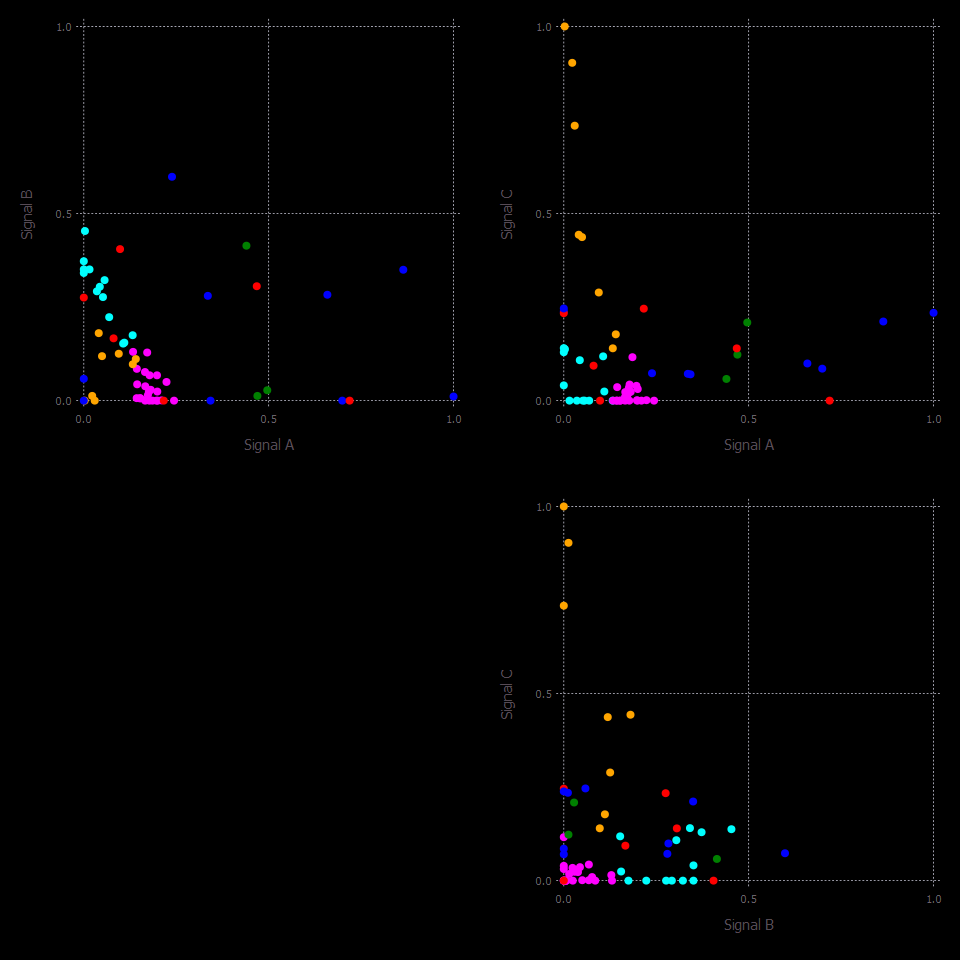

┌ Info: Number of signals: 4
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:280
┌ Info: Locations (signals=4)
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:284
┌ Warning: type Clustering.KmeansResult{Core.Array{Core.Float64,2},Core.Float64,Core.Int64} not present in workspace; reconstructing
└ @ JLD C:\Users\monty\.julia\packages\JLD\9wjVw\src\jld_types.jl:697


┌ Info: Robust k-means analysis results are loaded from file results-case01\Hmatrix-4-4_44-1000.jld!
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkCluster.jl:71
┌ Warning: Procedure to find unique signals could not identify a solution ...
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkCluster.jl:172
┌ Warning: Procedure to find unique signals could not identify a solution ...
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkCluster.jl:172
┌ Warning: Procedure to find unique signals could not identify a solution ...
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkCluster.jl:172
┌ Warning: Procedure to find unique signals could not identify a solution ...
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkCluster.jl:172
┌ Warning: type Clustering.KmeansResult{Core.Array{Core.Float64,2},Core.Float64,Core.Int64} not present in workspace; reconstructing
└ @ JLD C:\Users\monty\.julia\packages\JLD\9wjVw\src\jld_types.jl:697


15×2 Matrix{Any}:
 "Allen spr"       1.0
 "Turkey spr"      0.890671
 "Ash spr"         0.860399
 "Garton well"     0.837981
 "Mimbres spr"     0.756788
 "Spring"          0.727799
 "Mangas spr"      0.697281
 "Gila spr 1"      0.667903
 "Spring Can"      0.647347
 "Gila spr 2"      0.646943
 "Riverside well"  0.602983
 "Cliff spr"       0.592572
 "Freiborn spr"    0.579998
 "Apache well"     0.569518
 "Kennecott well"  0.546961

13×2 Matrix{Any}:
 "Fed H1 well"     1.0
 "Well 4"          0.820447
 "Los Alturas"     0.774358
 "Well 5"          0.771269
 "Well 2"          0.755708
 "Lightning Dock"  0.70557
 "Radium spr"      0.666575
 "Carne well"      0.631706
 "Well 3"          0.596359
 "Victoria well"   0.477645
 "Faywood spr"     0.378783
 "Goat spr"        0.330589
 "Derry spr"       0.324788

10×2 Matrix{Any}:
 "Jerry well"    1.0
 "Pueblo well"   0.978656
 "Rainbow spr"   0.926226
 "Sacred spr"    0.920803
 "Dent well"     0.911277
 "Alamos spr"    0.869018
 "Laguna Pbl"    0.779479
 "Well 1"        0.701792
 "Aragon spr"    0.678922
 "Ojo Caliente"  0.473437

6×2 Matrix{Any}:
 "Socorro Can"   1.0
 "Ojitos spr"    0.897681
 "Ojo Canas"     0.725719
 "T or C spr"    0.449617
 "B.Iorio well"  0.445734
 "Warm spr"      0.177576

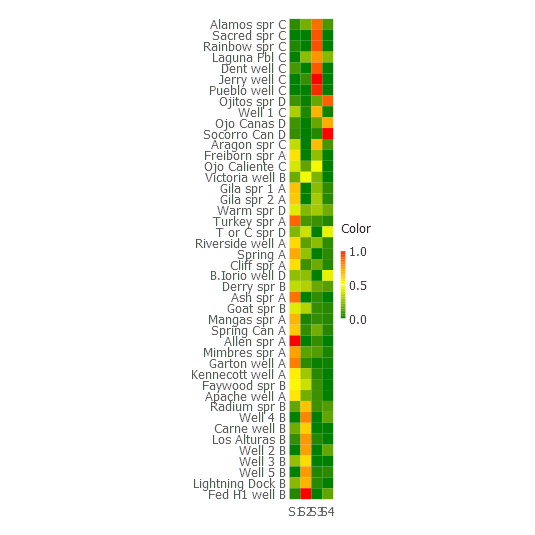

┌ Info: Robust k-means analysis results are loaded from file results-case01\Wmatrix-4-4_18-1000.jld!
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkCluster.jl:71
┌ Info: Signal A -> A Count: 15
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:400
┌ Info: Signal B -> B Count: 13
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:400
┌ Info: Signal C -> C Count: 10
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:400
┌ Info: Signal D -> D Count: 6
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:400
┌ Info: Signal A (S1) (k-means clustering)
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:417
┌ Info: Signal B (S2) (k-means clustering)
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:417
┌ Info: Signal C (S3) (k-means clustering)
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:417
┌ Info: Signal D (S4) (k-means clustering)
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:417


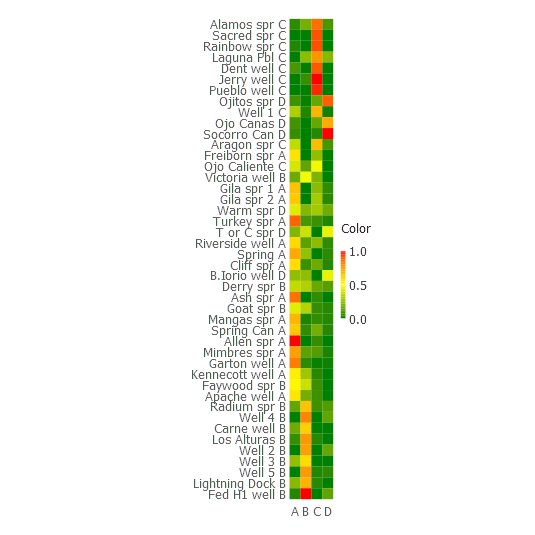

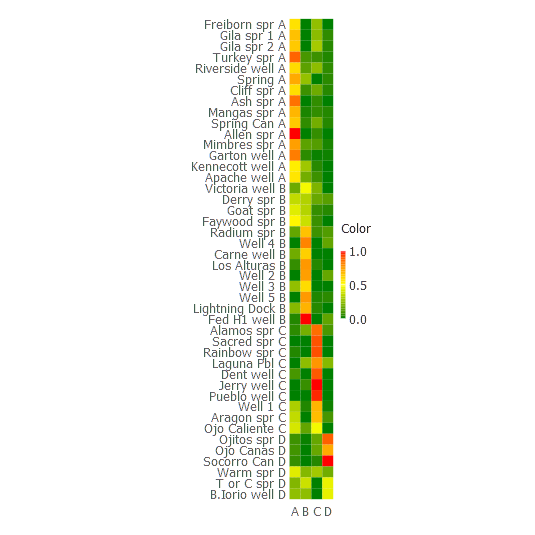

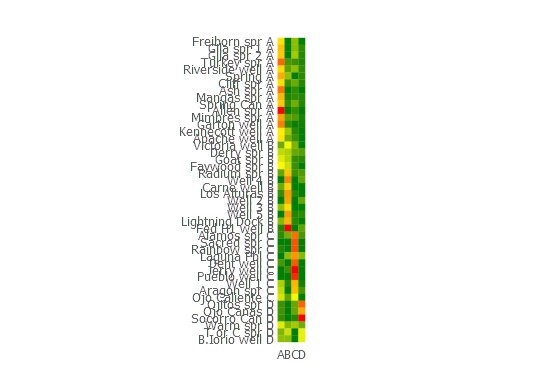

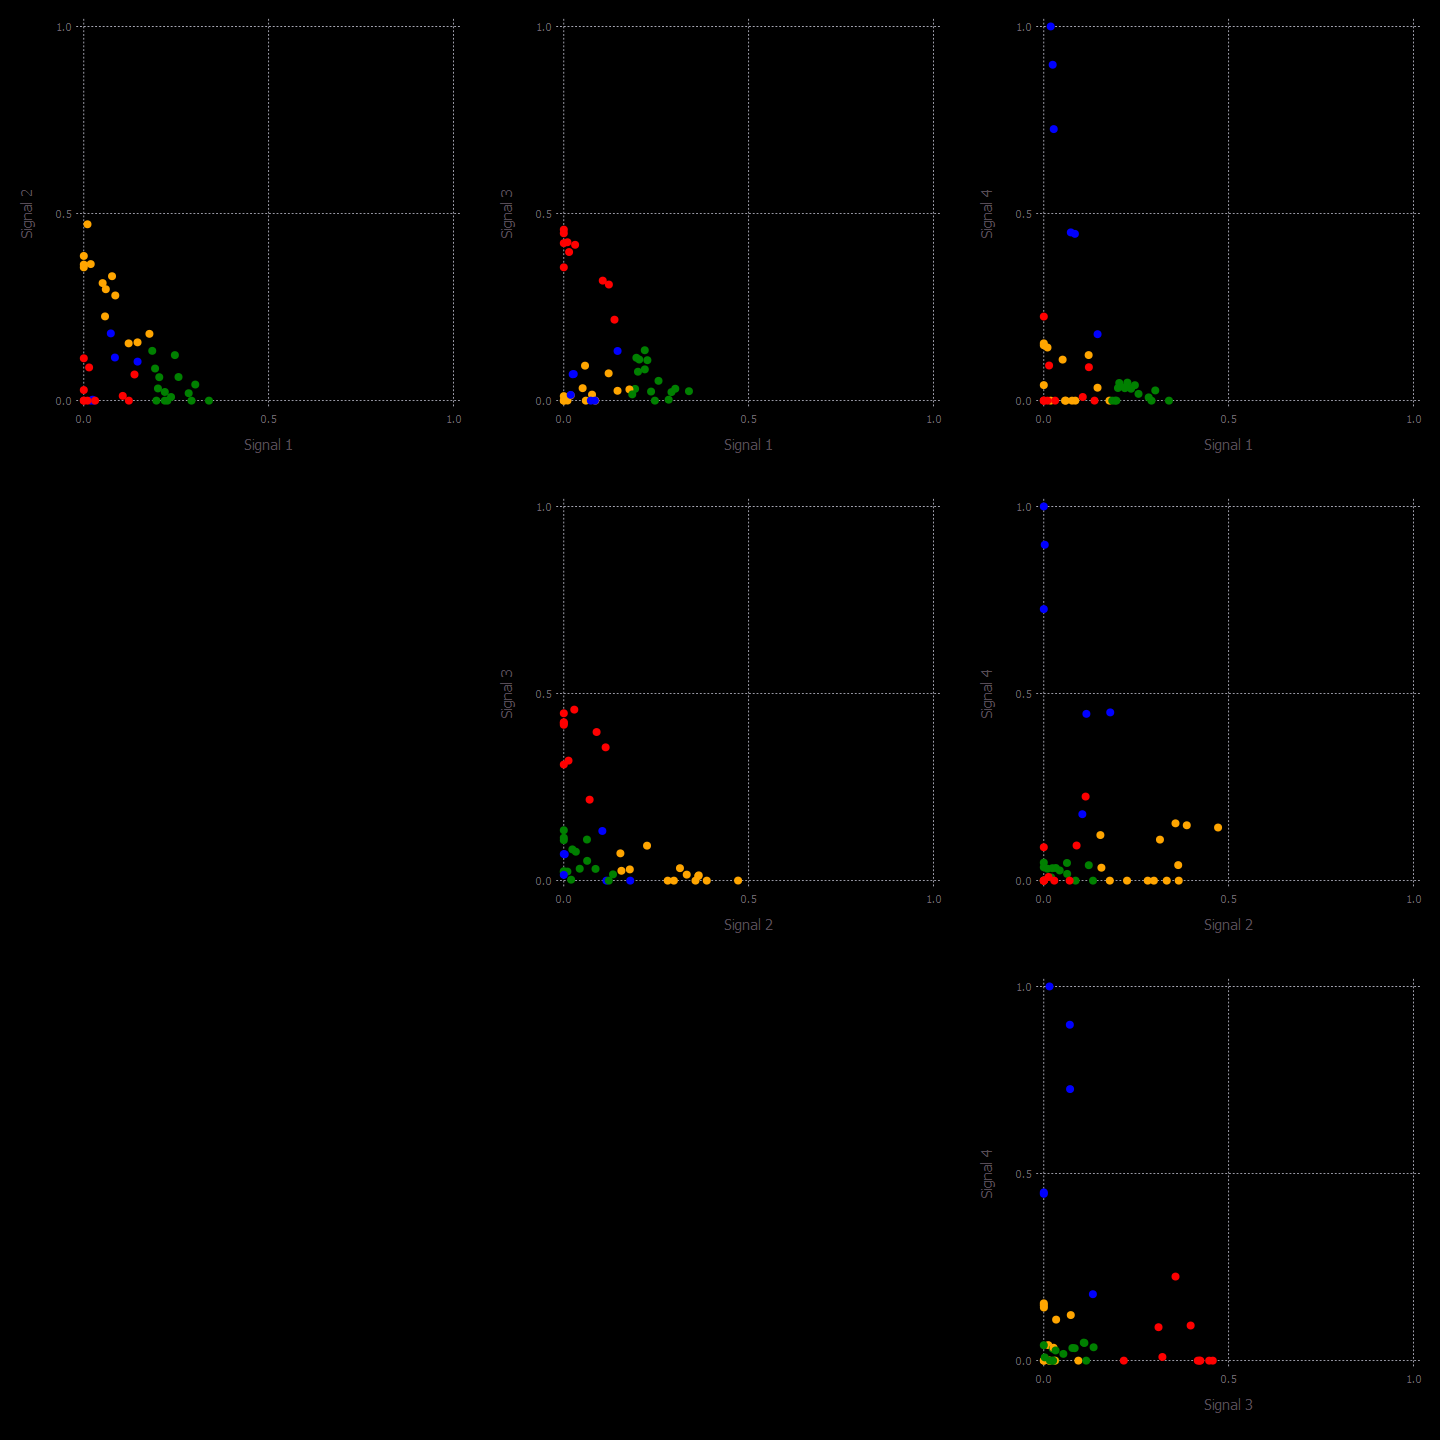

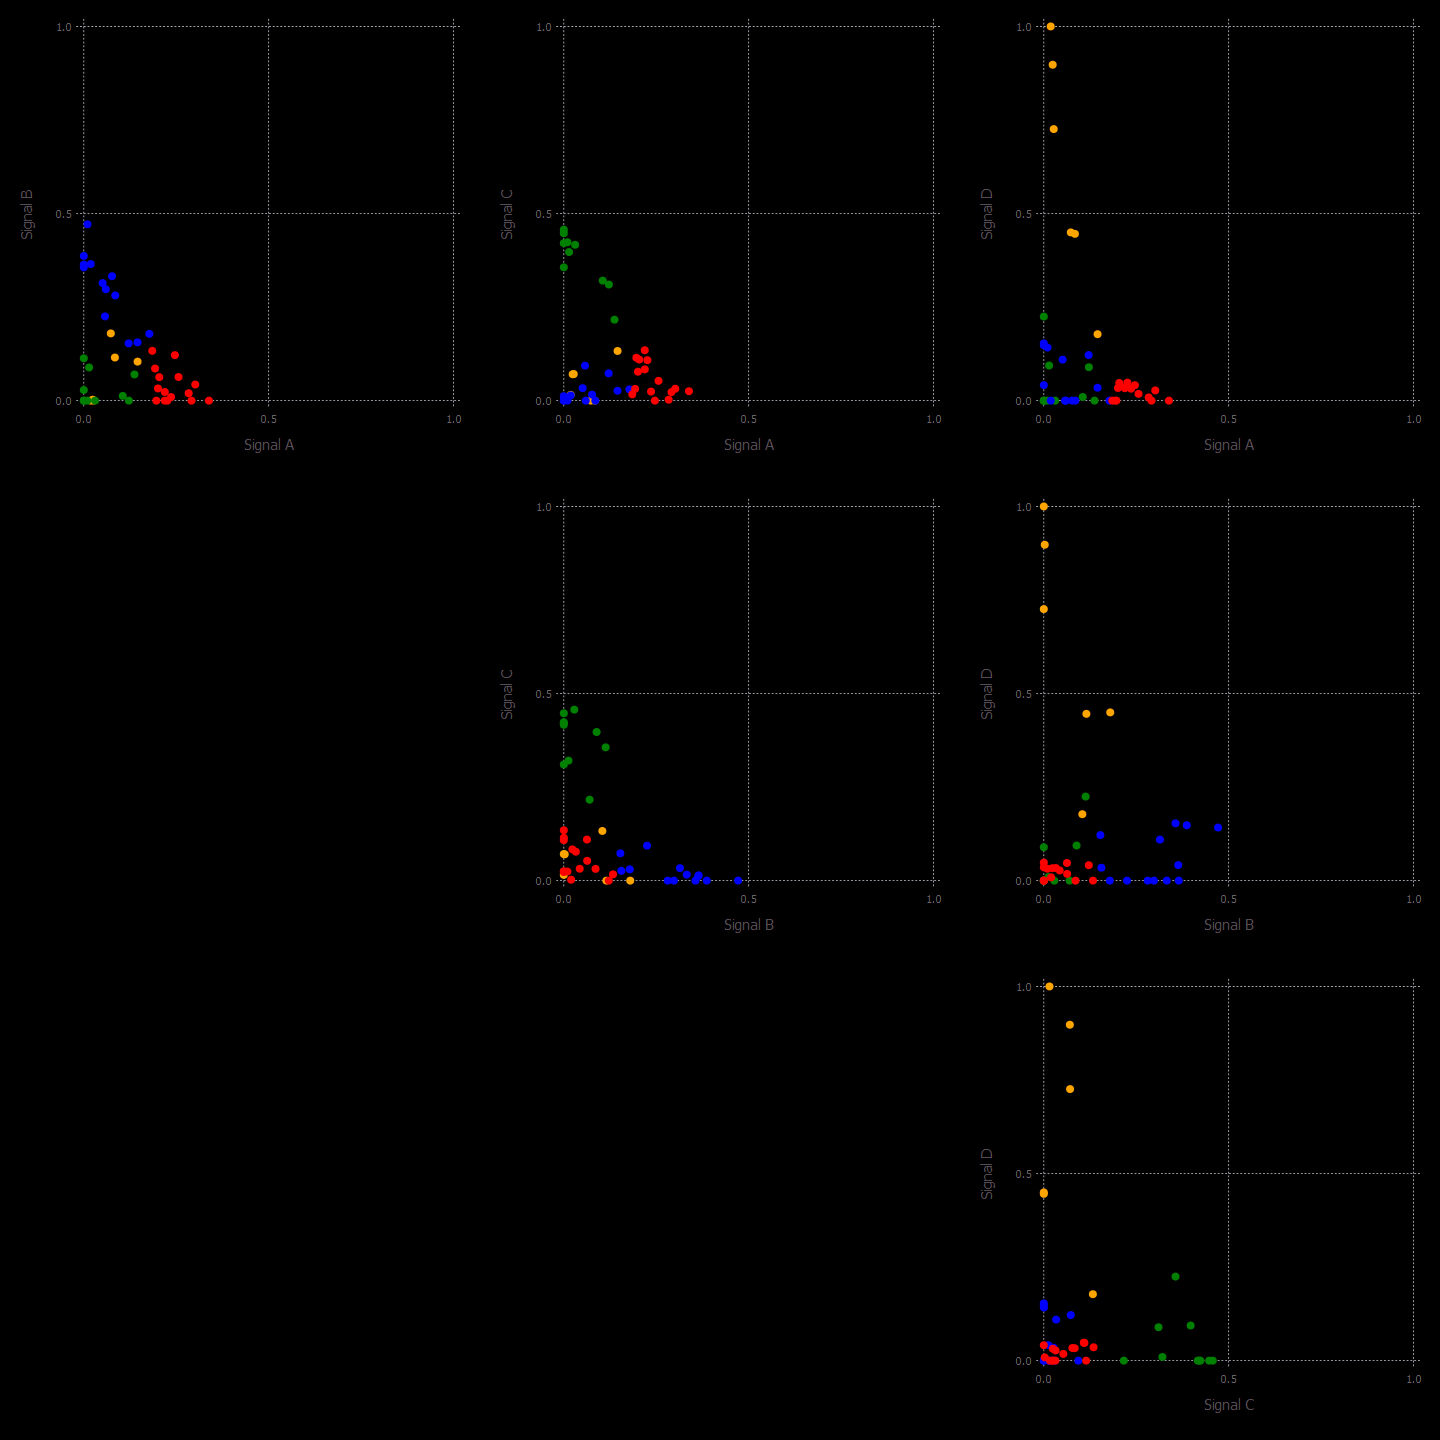

3×2 Matrix{Any}:
 "Silica geothermometer"    0.565319
 "State map fault density"  0.516354
 "Volcanic dike density"    0.46948

4×2 Matrix{Any}:
 "Depth to basement"         0.698015
 "Quaternary fault density"  0.473285
 "Hydraulic gradient"        0.00393436
 "Precipitation"             0.0

5×2 Matrix{Any}:
 "Crustal thickness"           1.0
 "Magnetic intensity"          0.556994
 "Drainage density"            0.495465
 "Heat flow"                   0.311164
 "Fault intersection density"  0.0

6×2 Matrix{Any}:
 "Seismicity"             0.95485
 "Spring density"         0.924999
 "Lithium concentration"  0.779688
 "Boron concentration"    0.465497
 "Volcanic vent density"  0.359763
 "Gravity anomaly"        0.313199

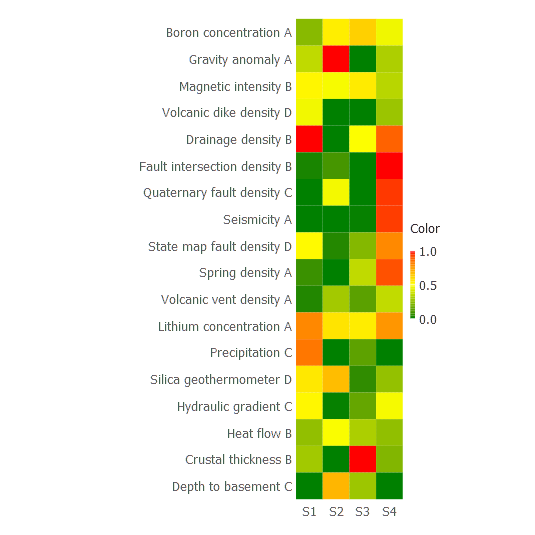

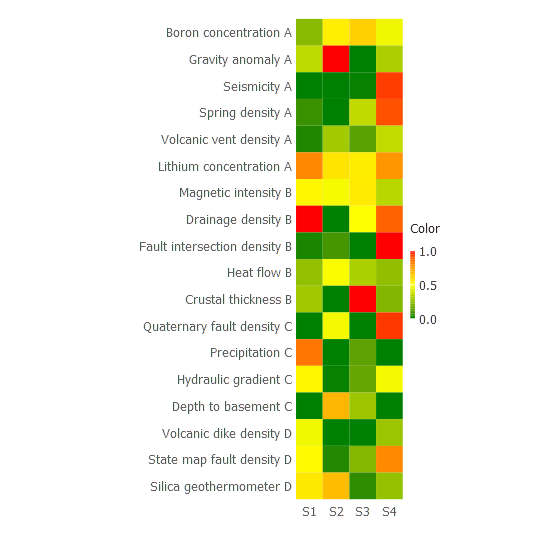

┌ Info: Attributes (signals=4)
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:481
┌ Info: Signal A (S4) Count: 6
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:494
┌ Info: Signal B (S3) Count: 5
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:494
┌ Info: Signal C (S2) Count: 4
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:494
┌ Info: Signal D (S1) Count: 3
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:494
┌ Info: Signal D -> A Count: 3
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:504
┌ Info: Signal C -> B Count: 4
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:504
┌ Info: Signal B -> C Count: 5
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:504
┌ Info: Signal A -> D Count: 6
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:504
┌ Info: Signal A (remapped k-means clustering)
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:519
┌ In

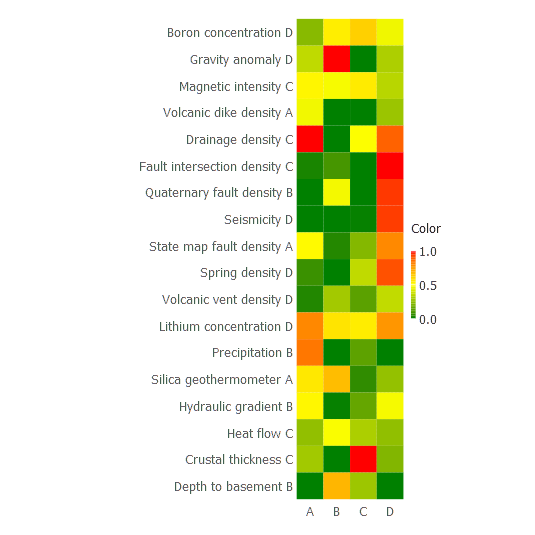

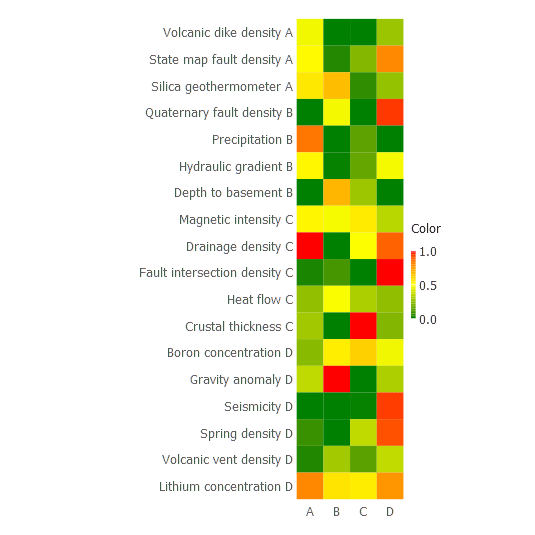

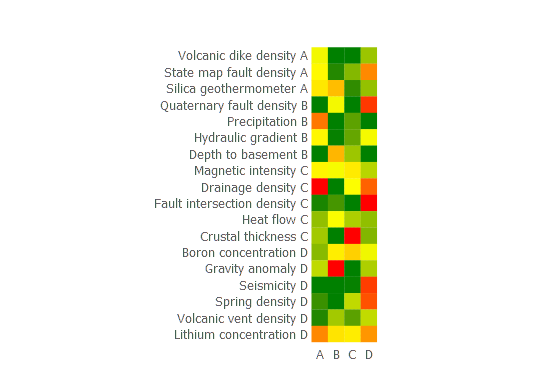

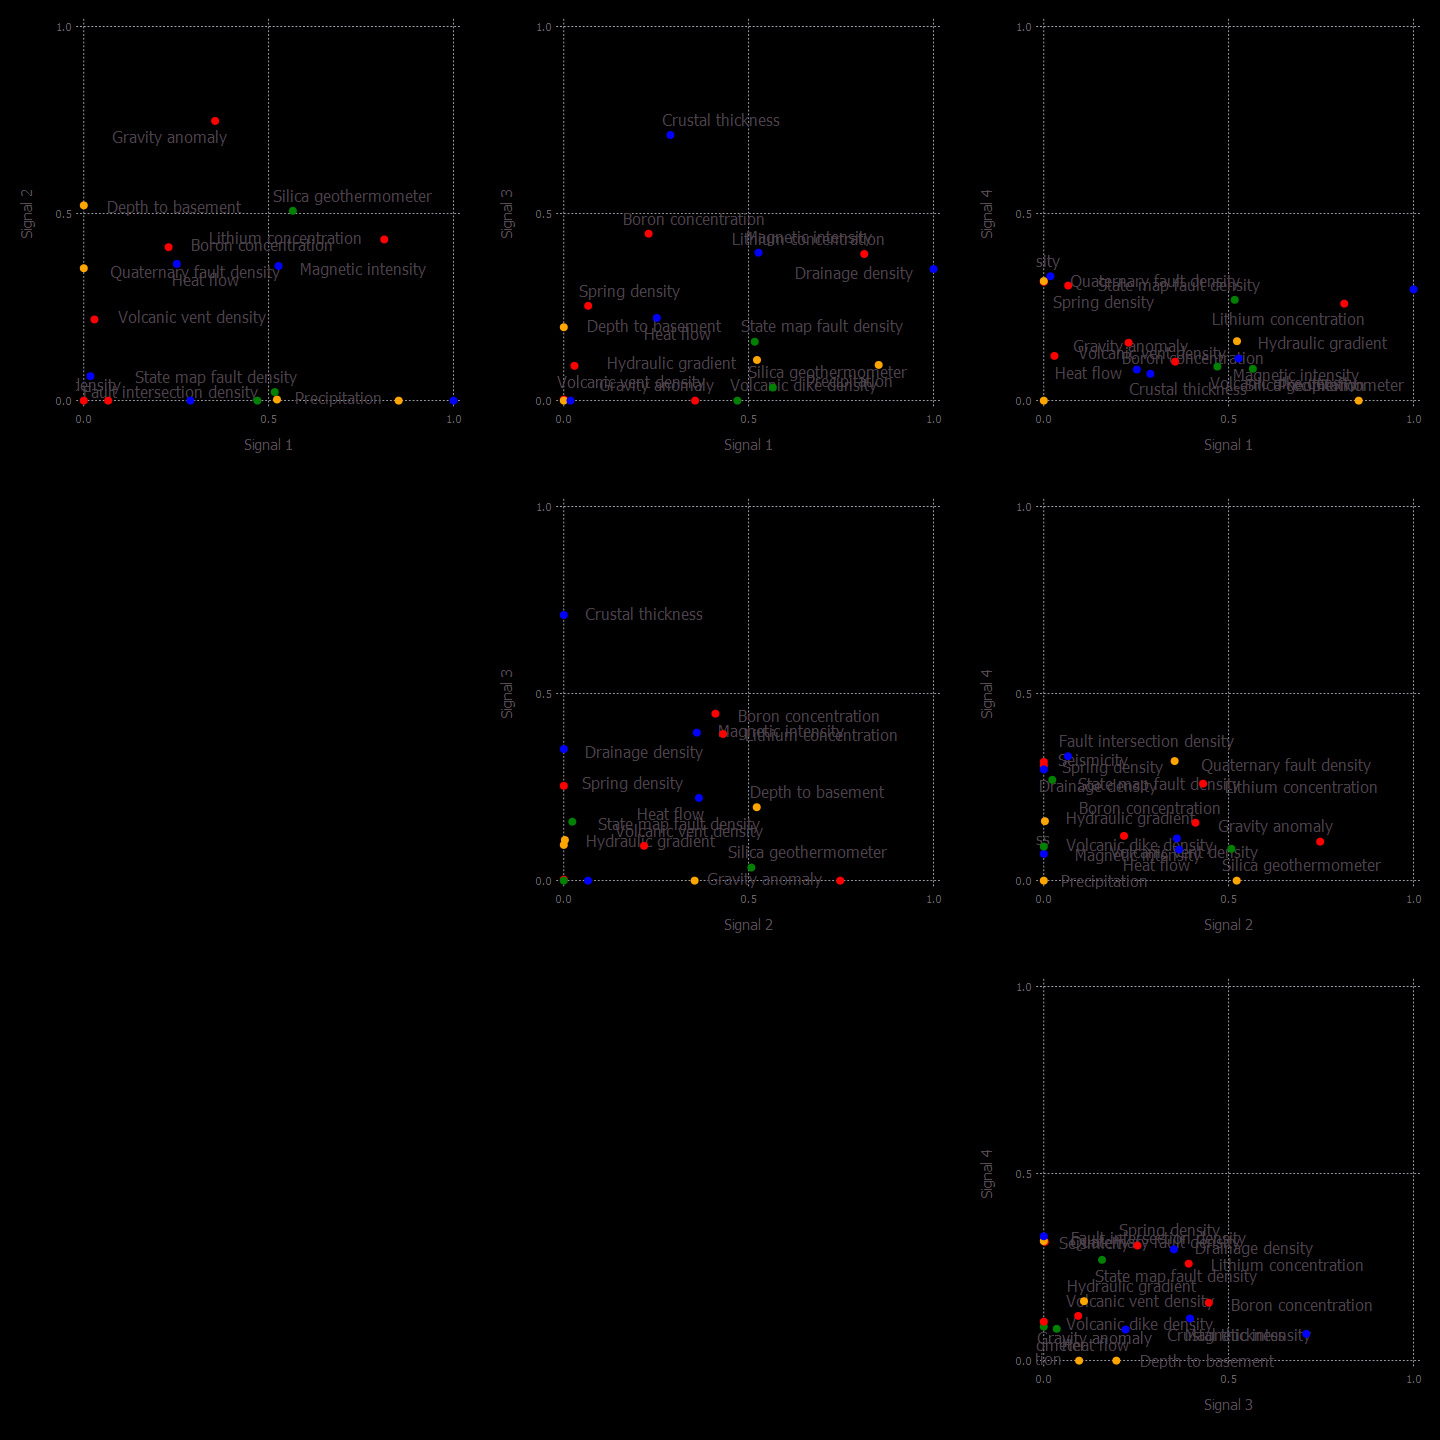

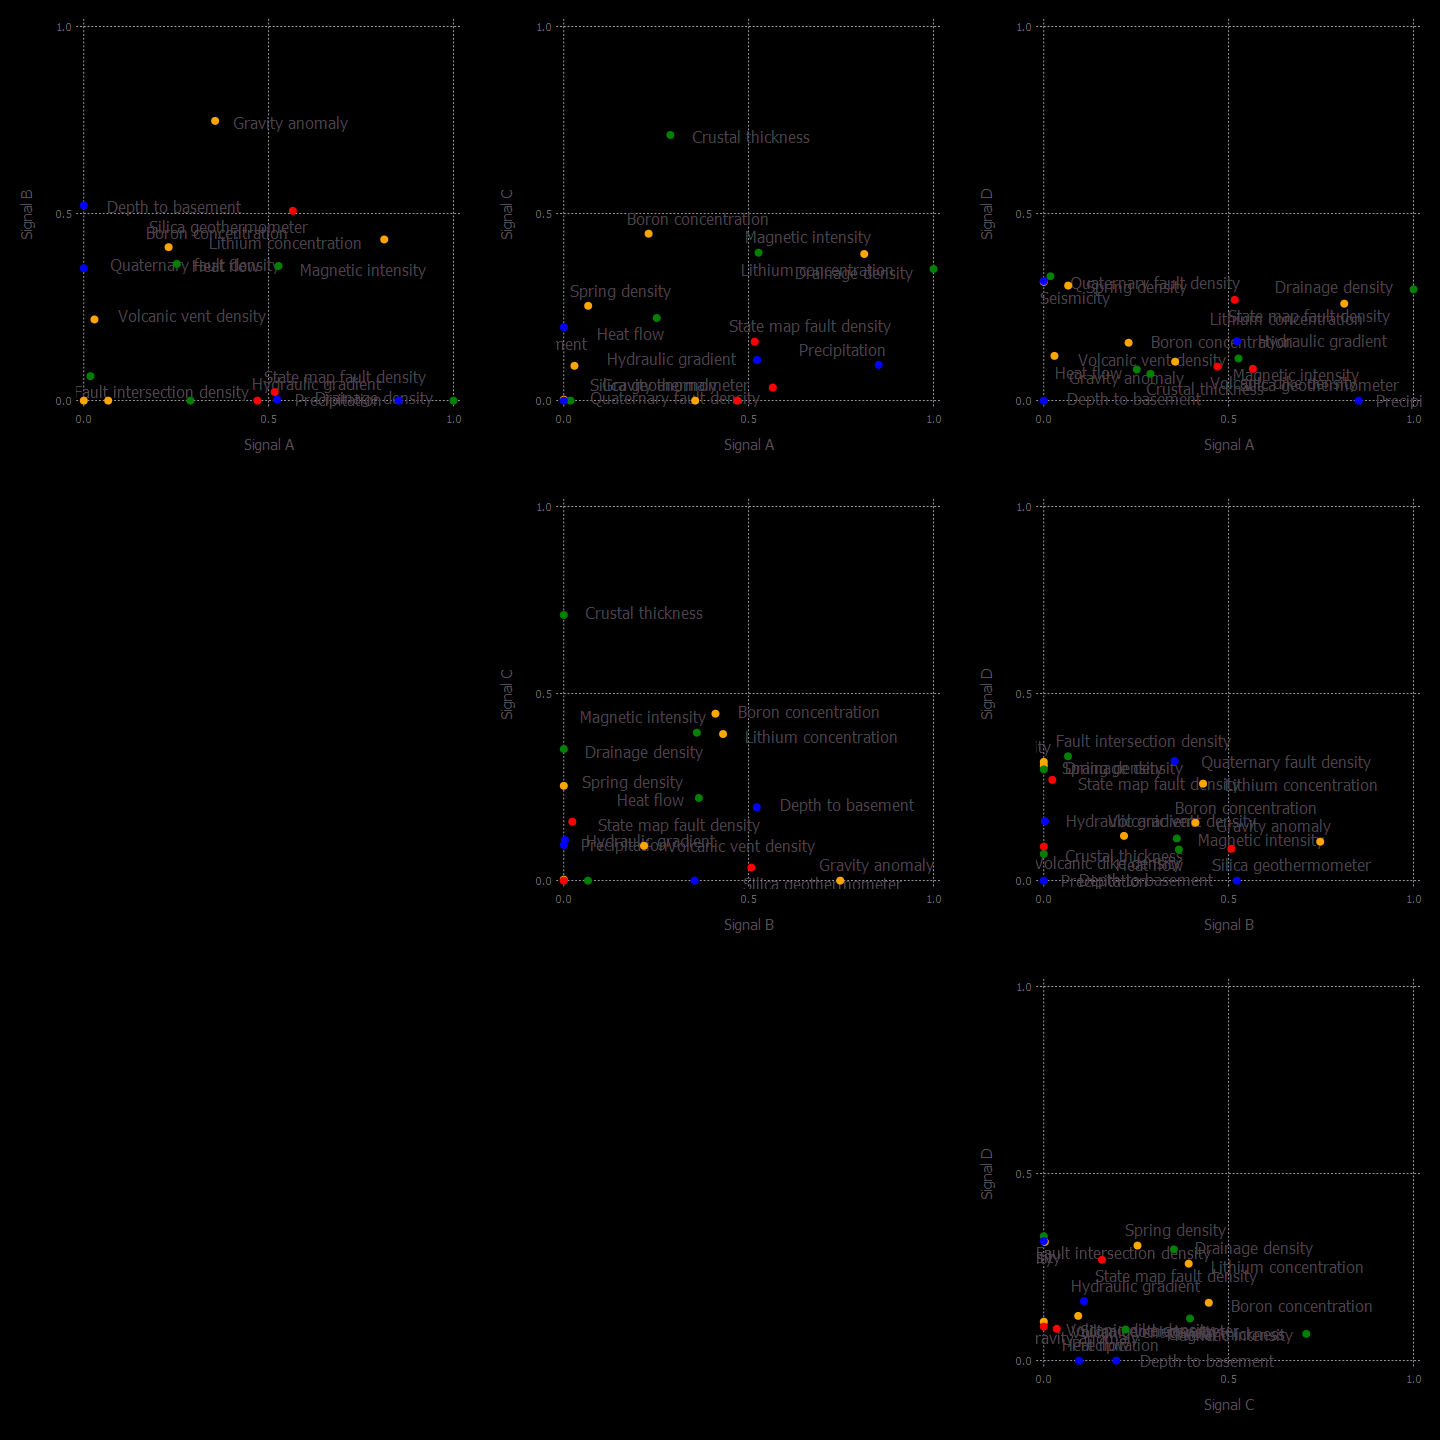

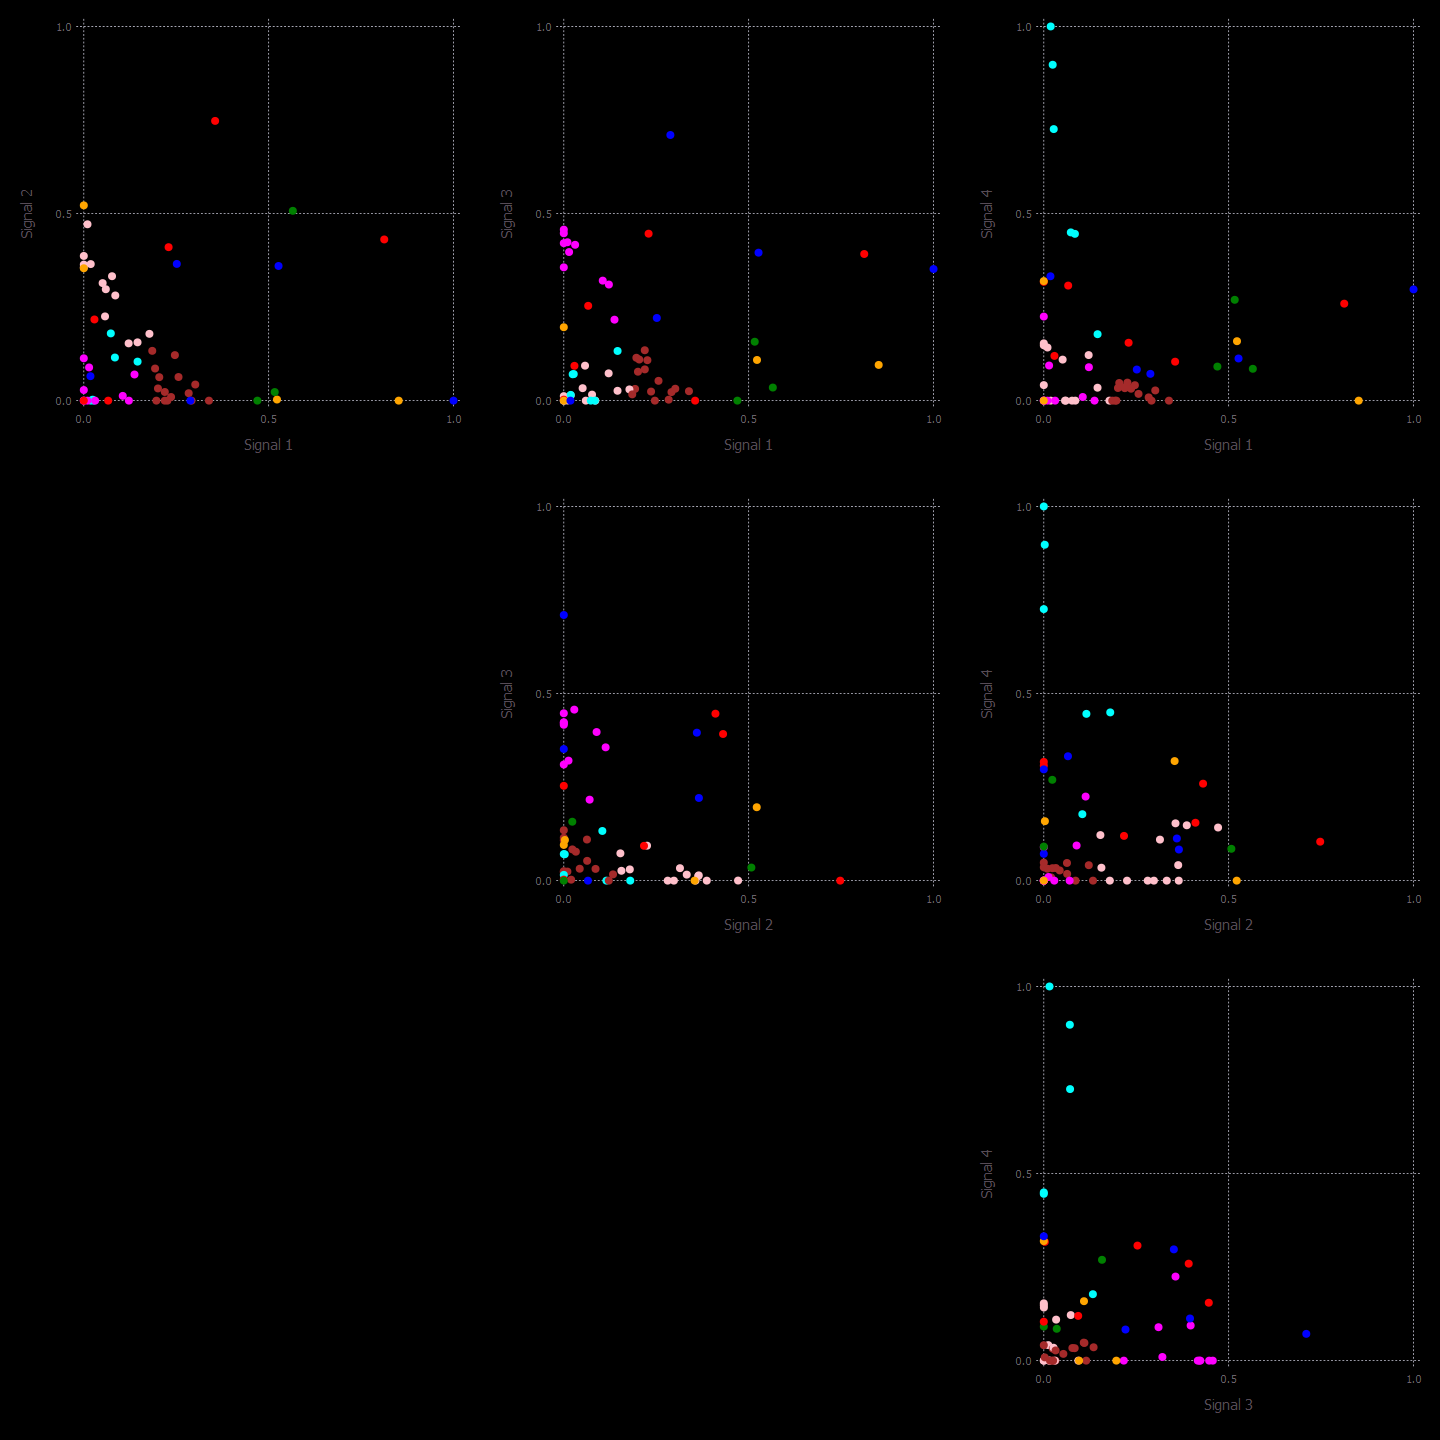

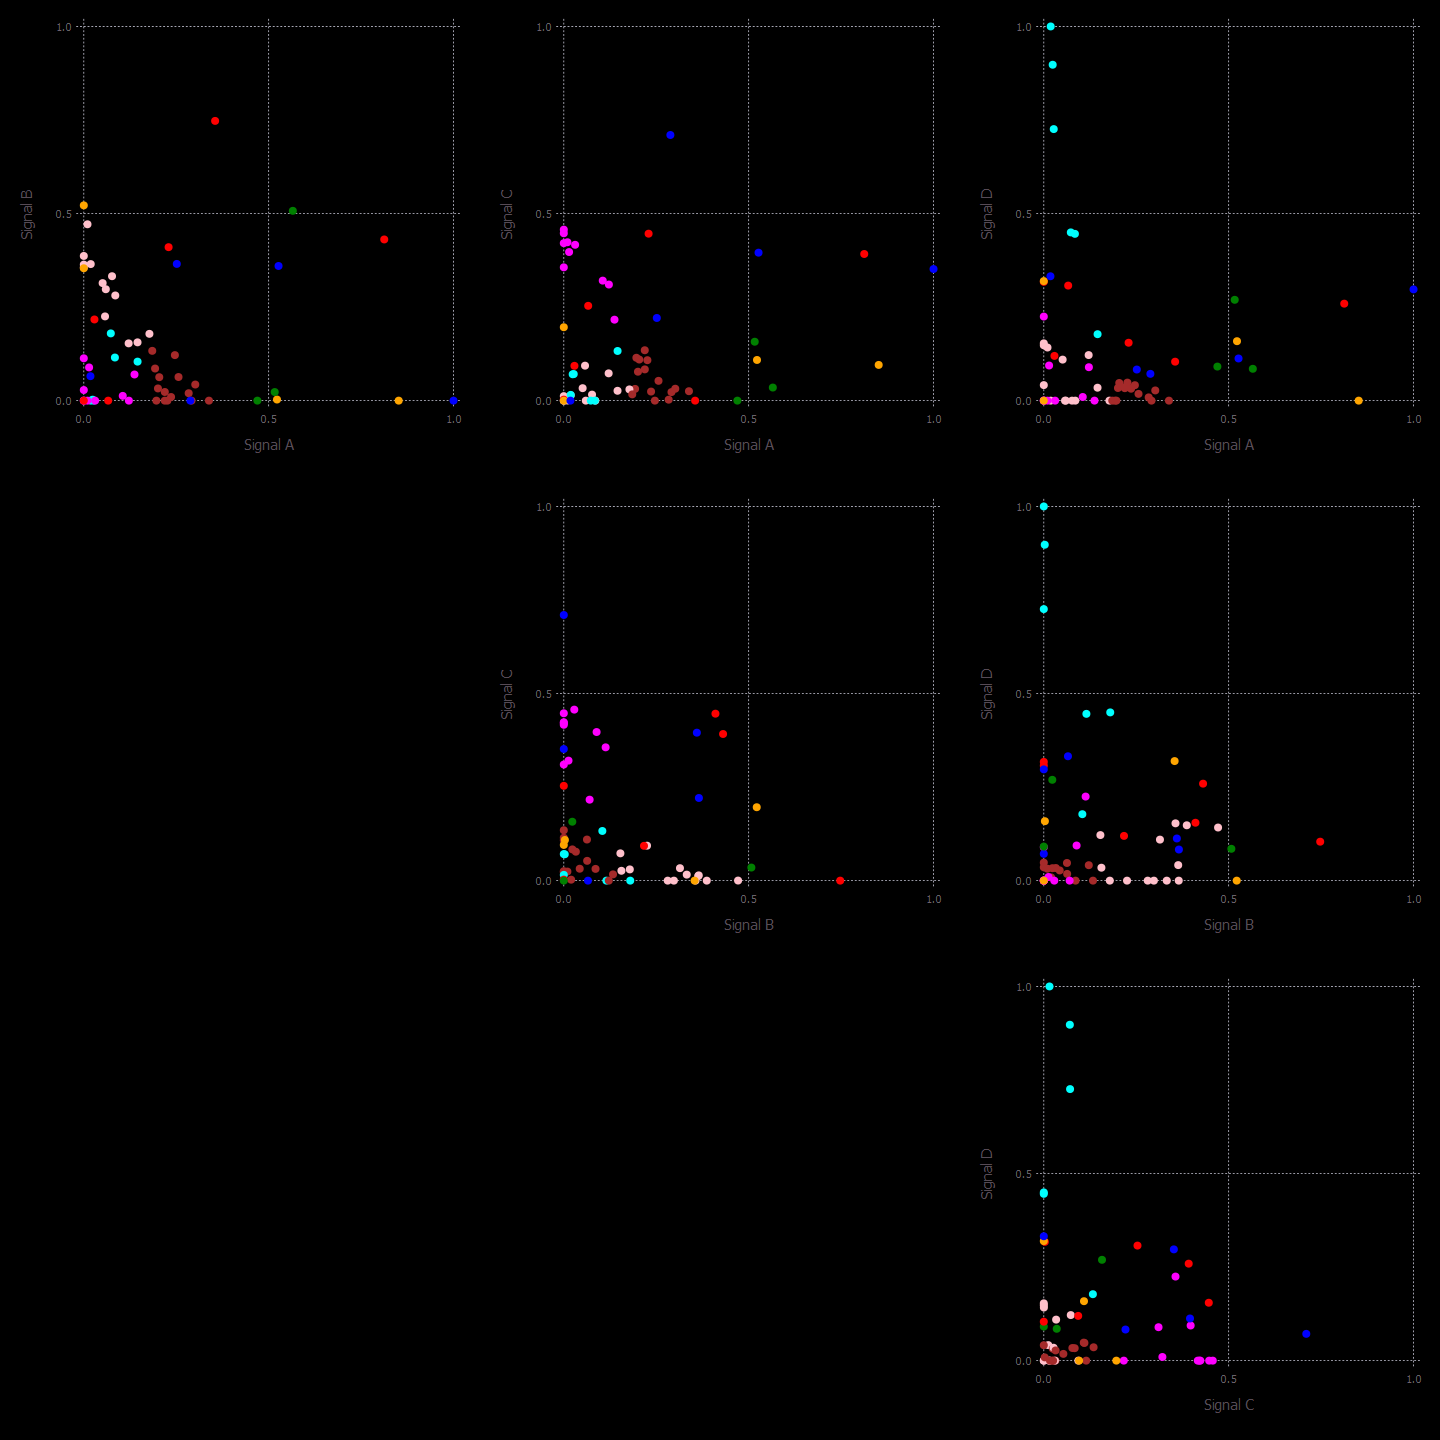

┌ Info: Number of signals: 5
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:280
┌ Info: Locations (signals=5)
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:284
┌ Warning: type Clustering.KmeansResult{Core.Array{Core.Float64,2},Core.Float64,Core.Int64} not present in workspace; reconstructing
└ @ JLD C:\Users\monty\.julia\packages\JLD\9wjVw\src\jld_types.jl:697


┌ Info: Robust k-means analysis results are loaded from file results-case01\Hmatrix-5-5_44-1000.jld!
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkCluster.jl:71
┌ Warning: Procedure to find unique signals could not identify a solution ...
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkCluster.jl:172
┌ Warning: Procedure to find unique signals could not identify a solution ...
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkCluster.jl:172
┌ Warning: Procedure to find unique signals could not identify a solution ...
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkCluster.jl:172
┌ Warning: Procedure to find unique signals could not identify a solution ...
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkCluster.jl:172
┌ Warning: Procedure to find unique signals could not identify a solution ...
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkCluster.jl:172
┌ Warning: type Clustering.KmeansResult{Core.Array{Core.Float64,2},Core.Float64,Core.Int64} not present in workspace; reconstructing

16×2 Matrix{Any}:
 "Ash spr"         1.0
 "Allen spr"       0.932476
 "Mangas spr"      0.883364
 "Riverside well"  0.834285
 "Apache well"     0.782126
 "Spring Can"      0.691235
 "Turkey spr"      0.677725
 "Spring"          0.676908
 "Cliff spr"       0.650192
 "Warm spr"        0.649358
 "Garton well"     0.617193
 "Faywood spr"     0.60702
 "Kennecott well"  0.598779
 "Derry spr"       0.578414
 "Mimbres spr"     0.564978
 "Goat spr"        0.36953

10×2 Matrix{Any}:
 "Fed H1 well"     1.0
 "Well 4"          0.848078
 "Los Alturas"     0.815345
 "Well 2"          0.788889
 "Well 5"          0.777949
 "Lightning Dock"  0.687945
 "Carne well"      0.627357
 "Radium spr"      0.625606
 "Well 3"          0.59283
 "Victoria well"   0.379997

8×2 Matrix{Any}:
 "Jerry well"   1.0
 "Pueblo well"  0.971051
 "Rainbow spr"  0.942867
 "Sacred spr"   0.935706
 "Dent well"    0.927135
 "Alamos spr"   0.872535
 "Laguna Pbl"   0.85495
 "Well 1"       0.738413

5×2 Matrix{Any}:
 "Socorro Can"   1.0
 "Ojitos spr"    0.885484
 "Ojo Canas"     0.707981
 "T or C spr"    0.411346
 "B.Iorio well"  0.409252

5×2 Matrix{Any}:
 "Freiborn spr"  1.0
 "Gila spr 1"    0.779561
 "Gila spr 2"    0.695982
 "Aragon spr"    0.695158
 "Ojo Caliente"  0.359767

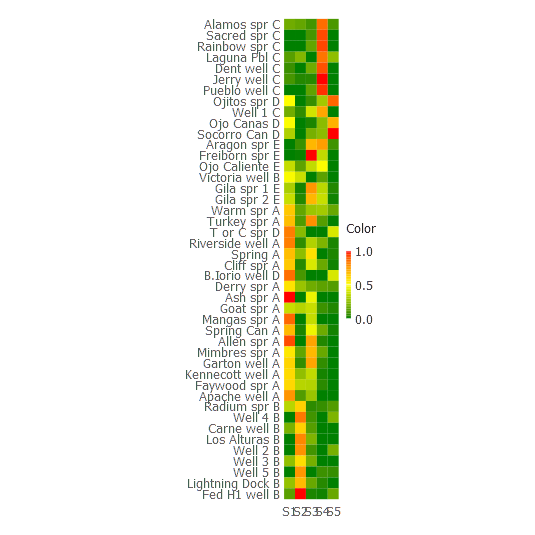

┌ Info: Robust k-means analysis results are loaded from file results-case01\Wmatrix-5-5_18-1000.jld!
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkCluster.jl:71
┌ Warning: Procedure to find unique signals could not identify a solution ...
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkCluster.jl:172
┌ Info: Signal A -> A Count: 16
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:400
┌ Info: Signal B -> B Count: 10
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:400
┌ Info: Signal C -> C Count: 8
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:400
┌ Info: Signal D -> D Count: 5
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:400
┌ Info: Signal E -> E Count: 5
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:400
┌ Info: Signal A (S1) (k-means clustering)
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:417
┌ Info: Signal B (S2) (k-means clustering)
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPos

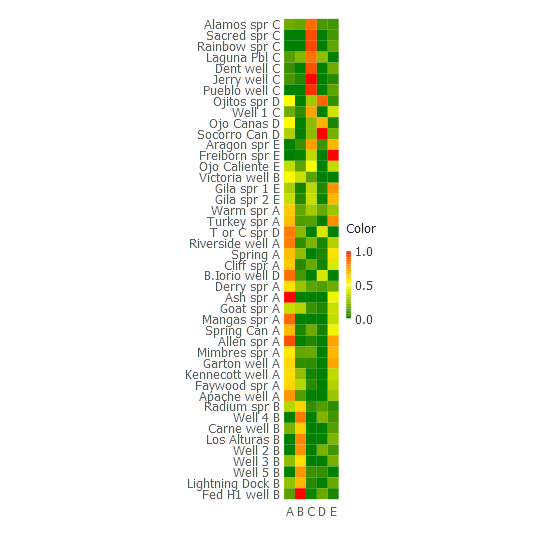

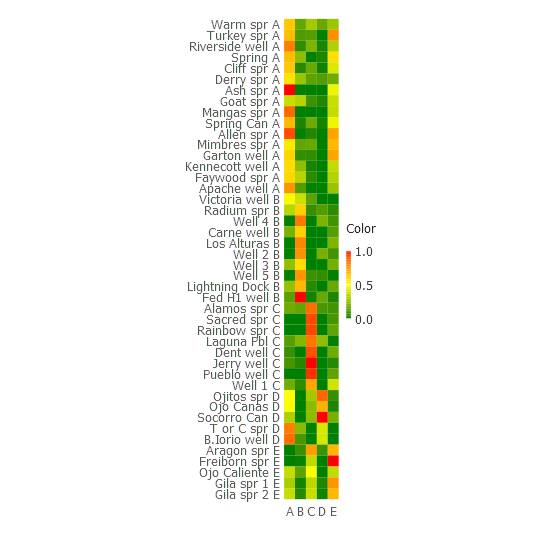

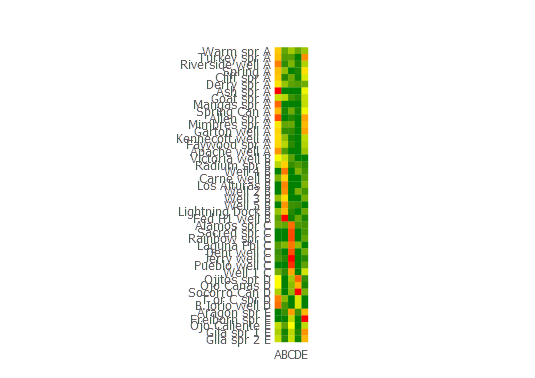

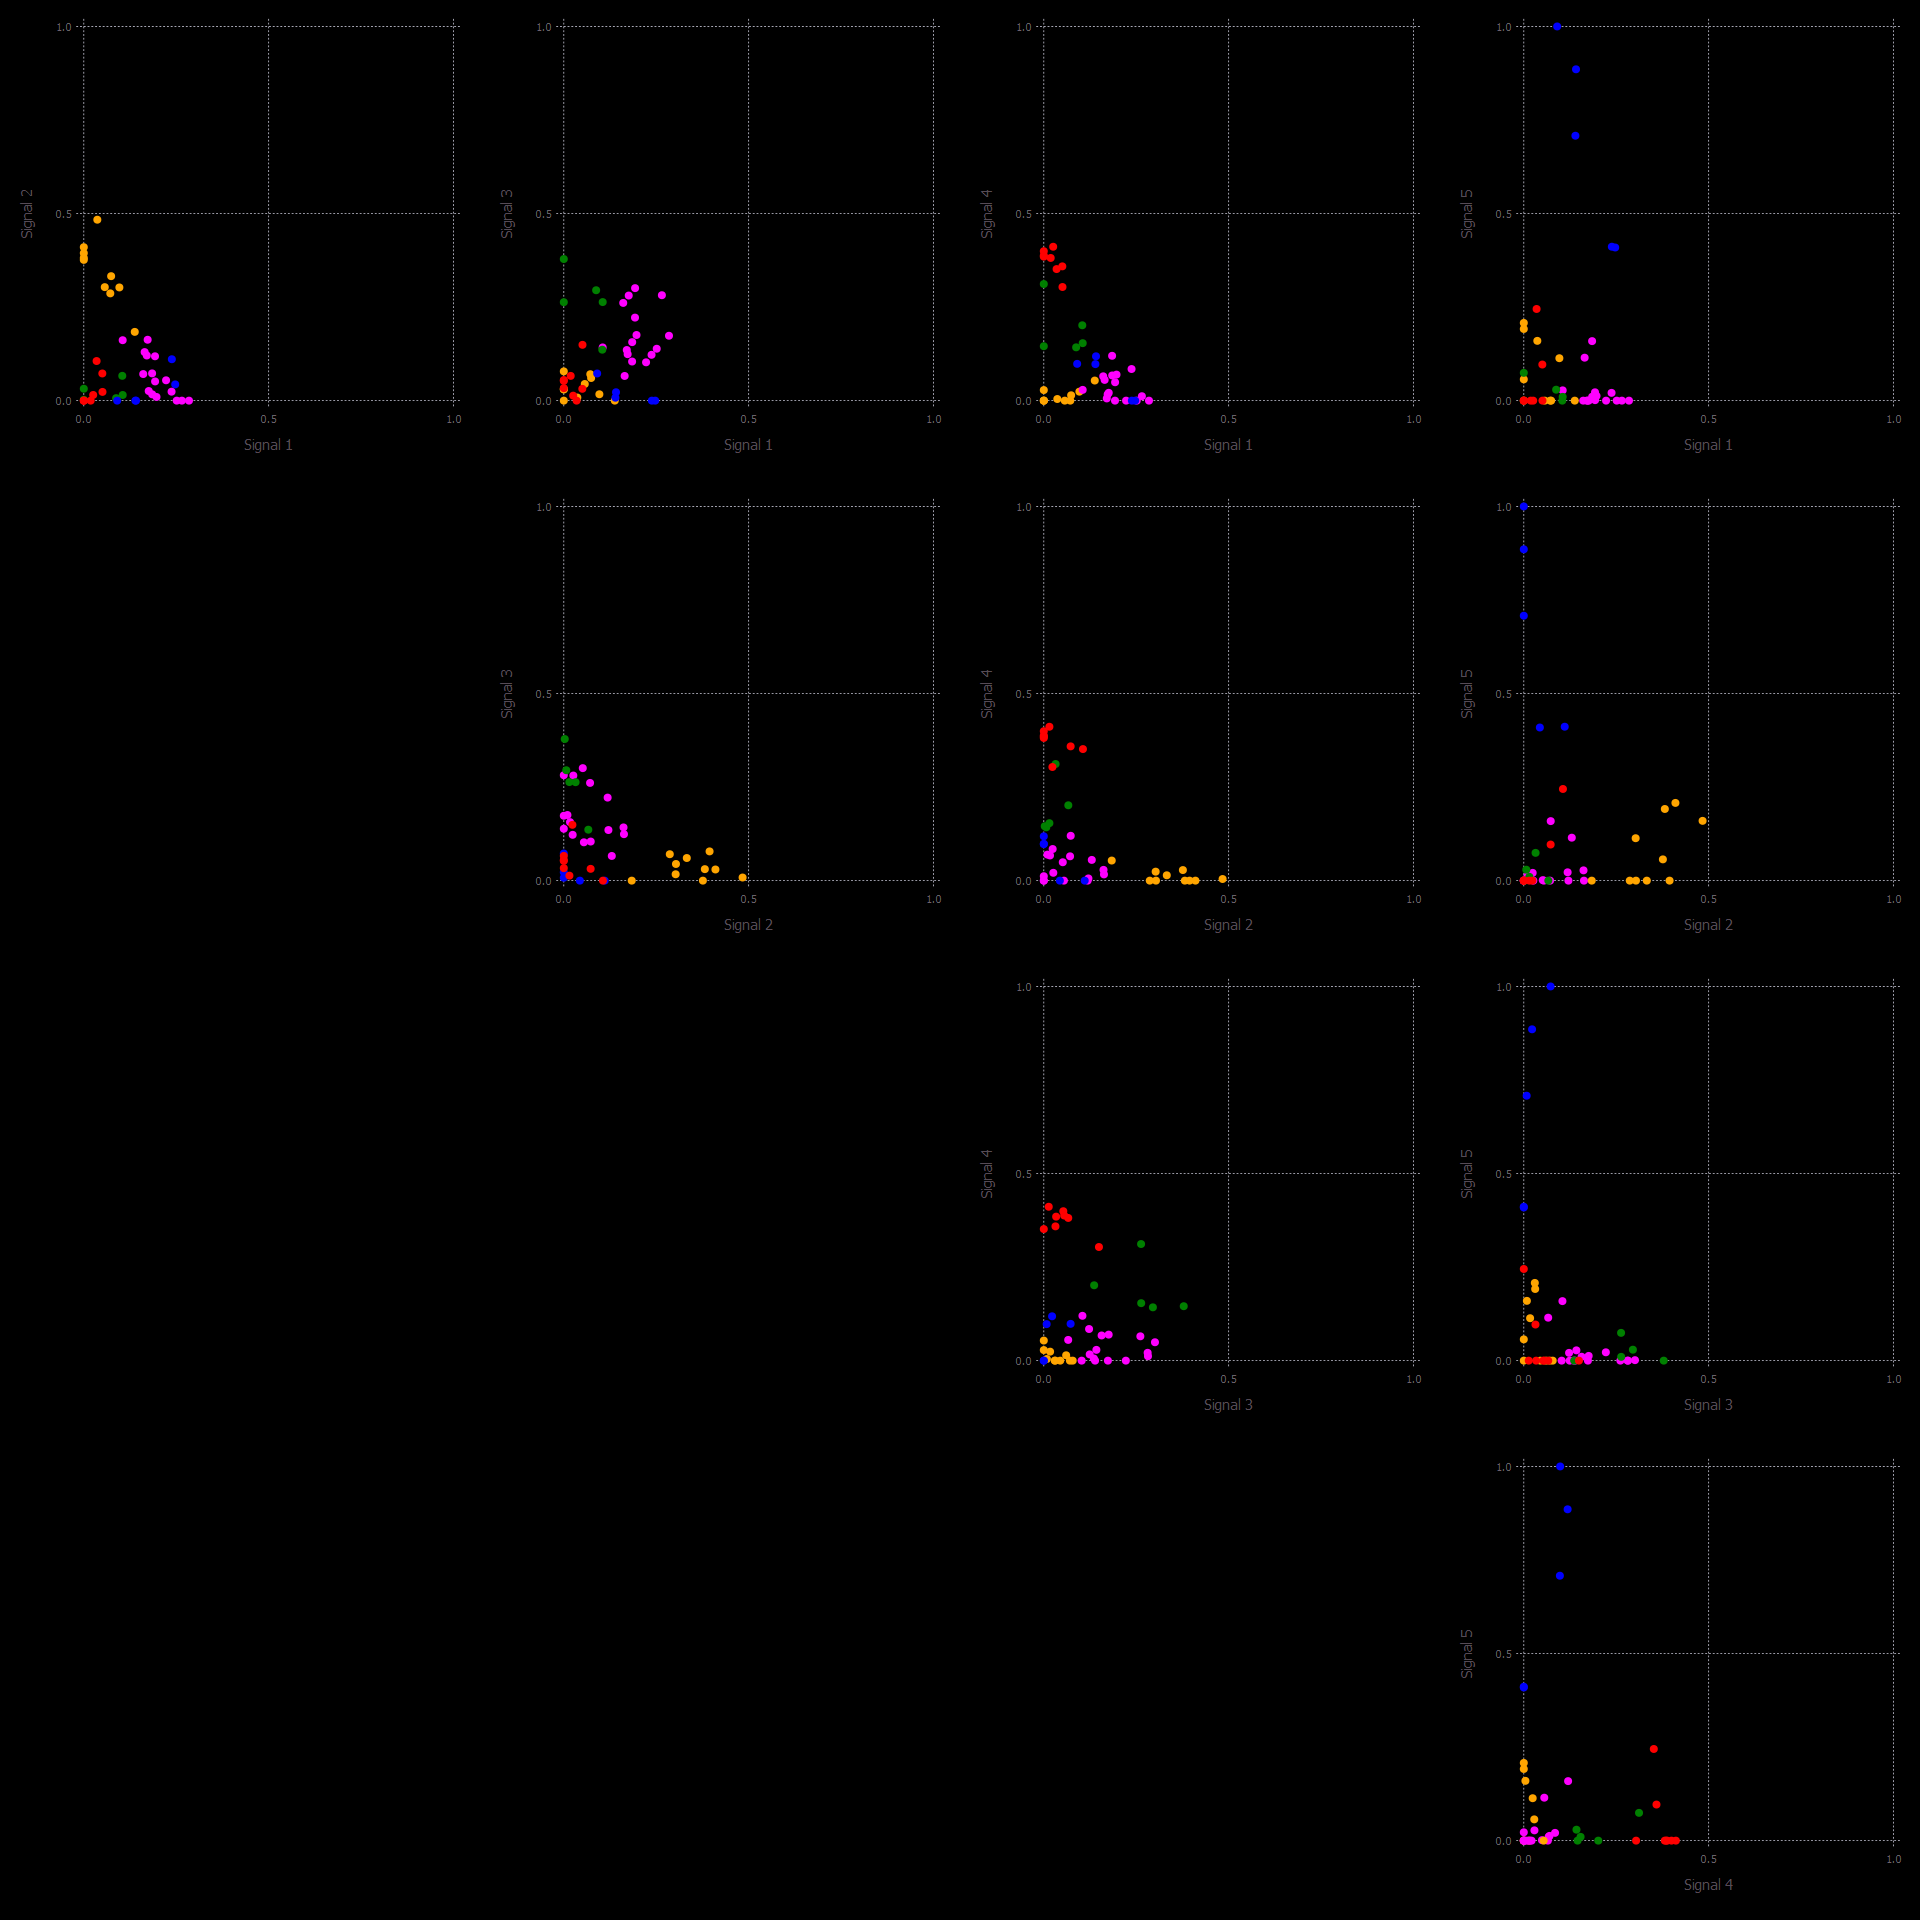

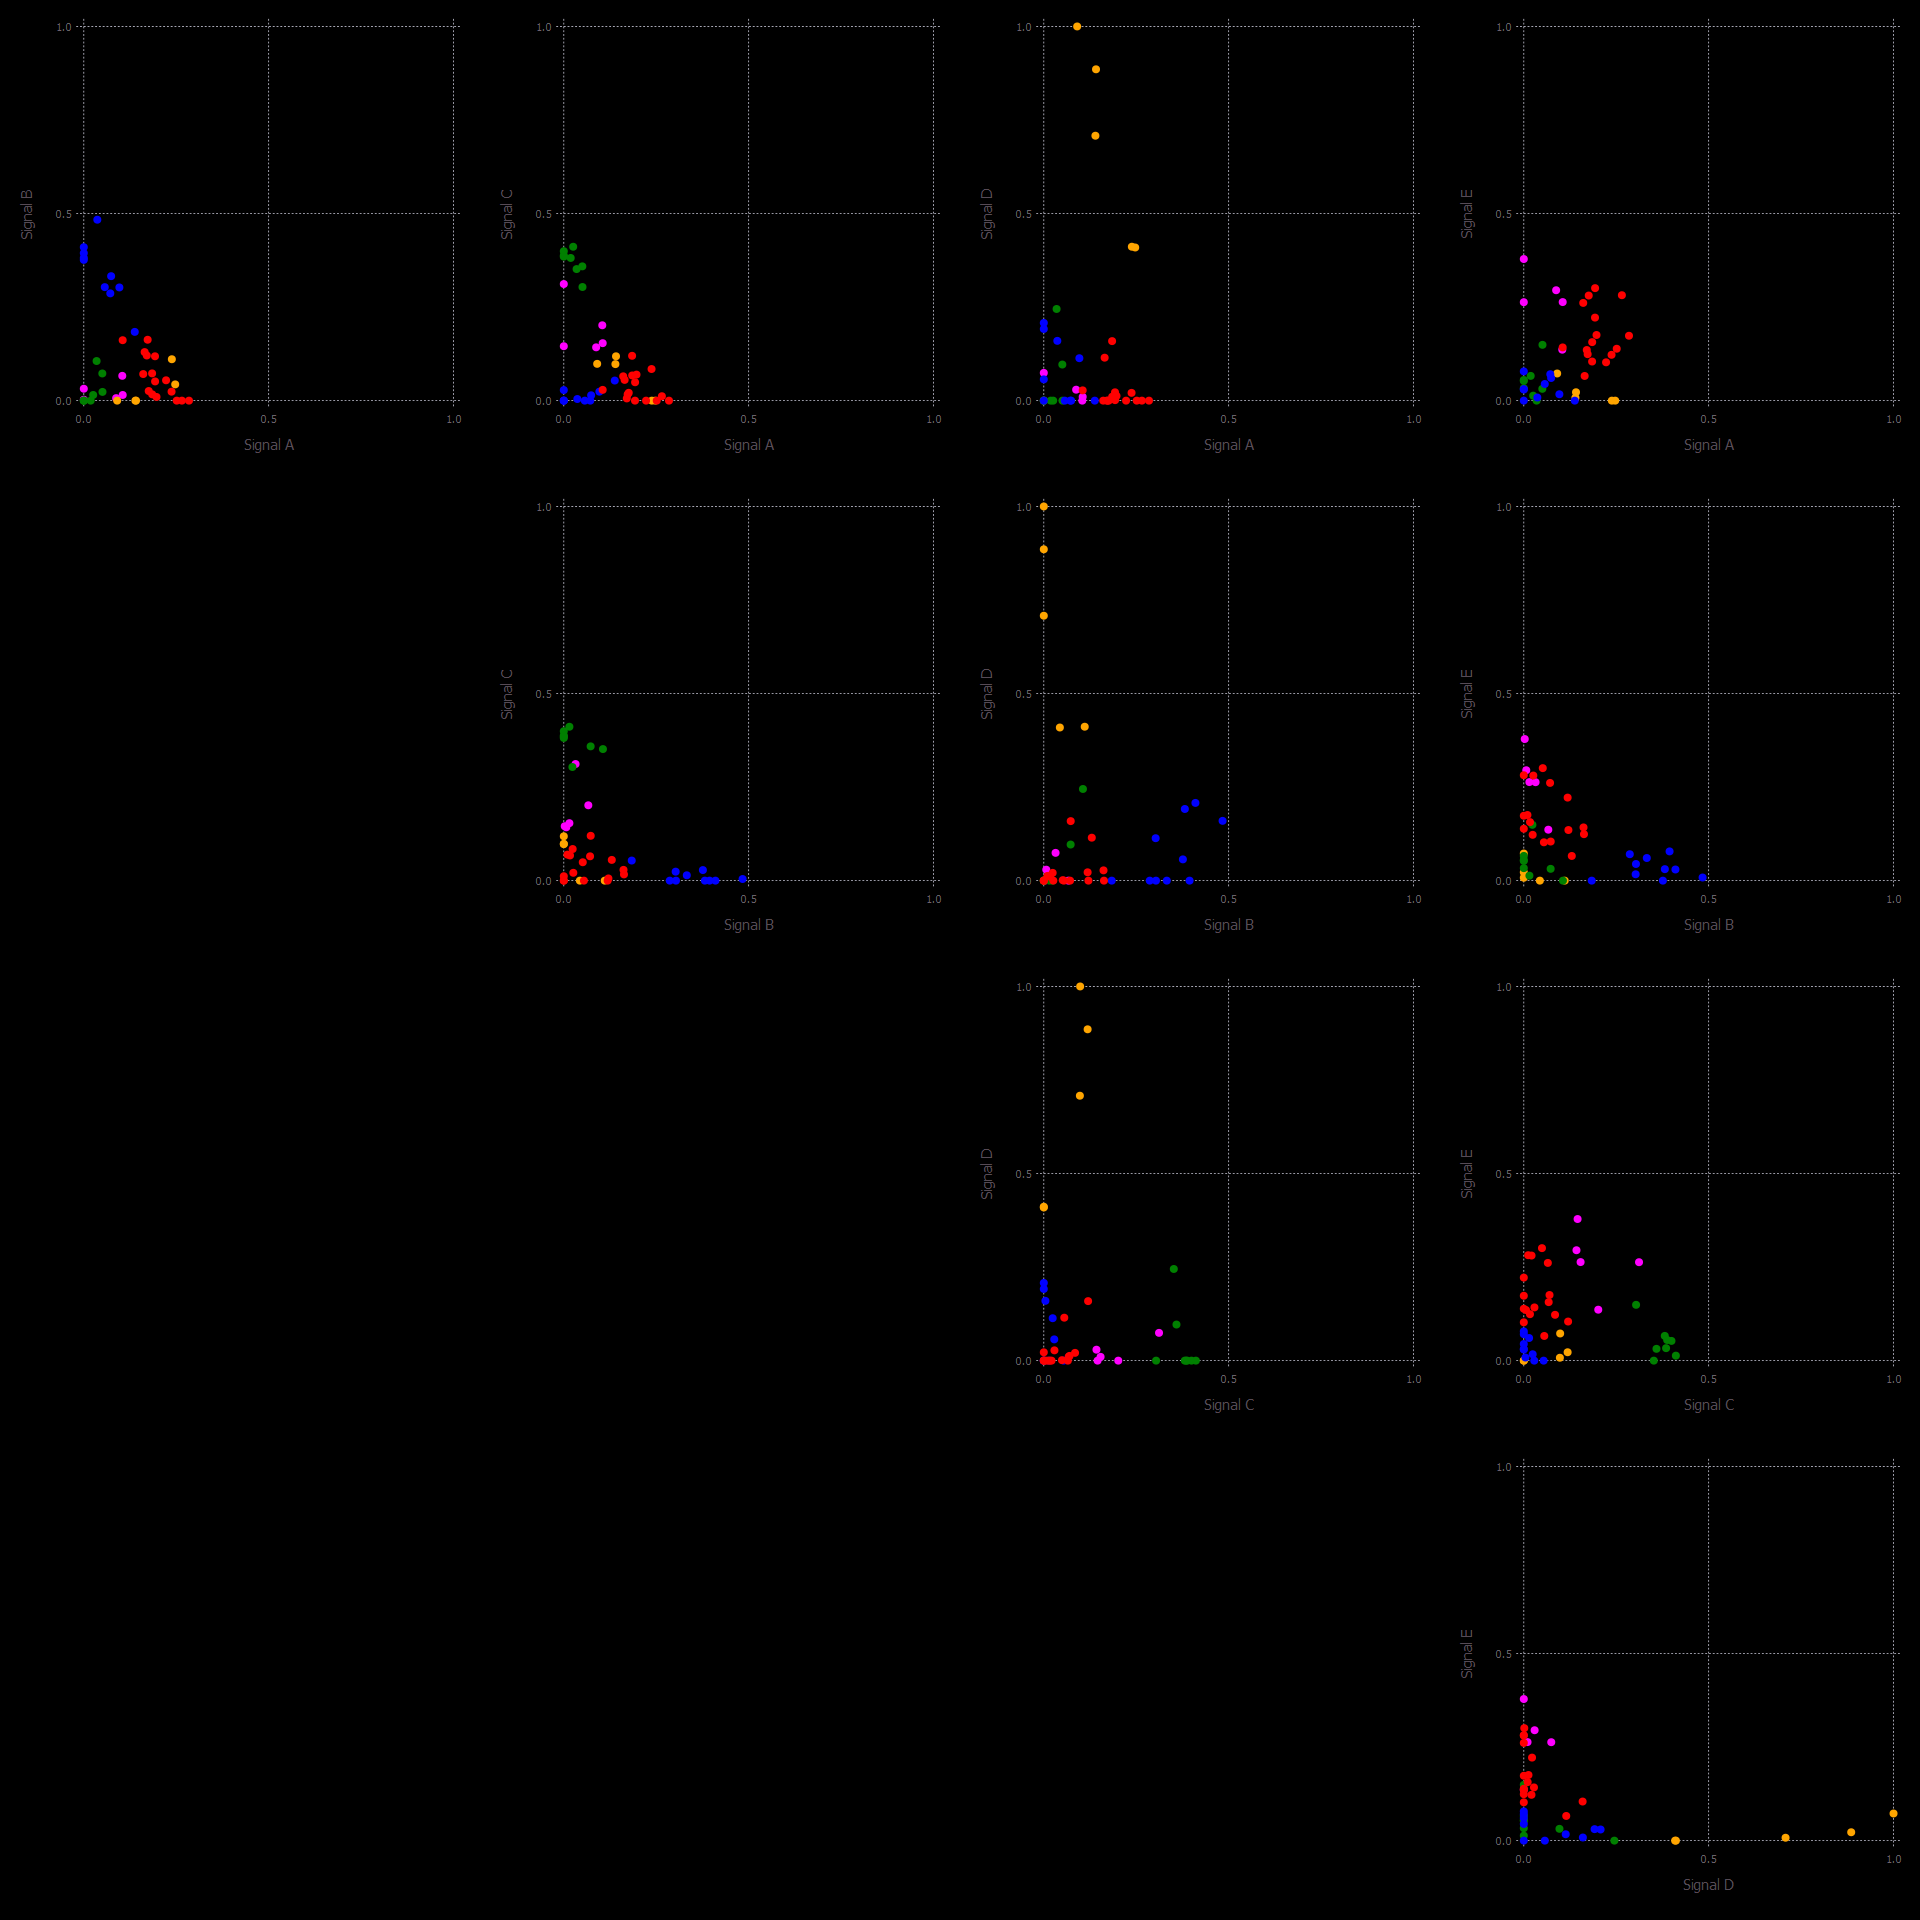

2×2 Matrix{Any}:
 "Lithium concentration"  1.0
 "Volcanic dike density"  0.56854

6×2 Matrix{Any}:
 "Depth to basement"         0.760709
 "Boron concentration"       0.565134
 "Quaternary fault density"  0.481084
 "Volcanic vent density"     0.303895
 "Spring density"            0.0
 "Precipitation"             0.0

4×2 Matrix{Any}:
 "Crustal thickness"   1.0
 "Magnetic intensity"  0.590051
 "Seismicity"          0.0030882
 "Gravity anomaly"     0.0

3×2 Matrix{Any}:
 "Fault intersection density"  0.921753
 "Drainage density"            0.458627
 "Heat flow"                   0.183895

3×2 Matrix{Any}:
 "State map fault density"  0.755023
 "Hydraulic gradient"       0.743237
 "Silica geothermometer"    0.553526

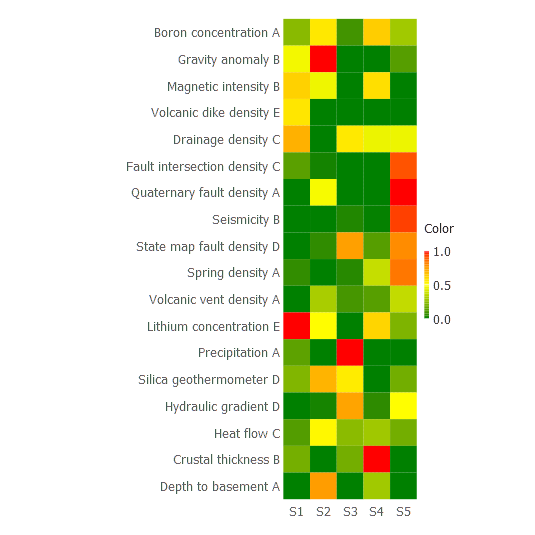

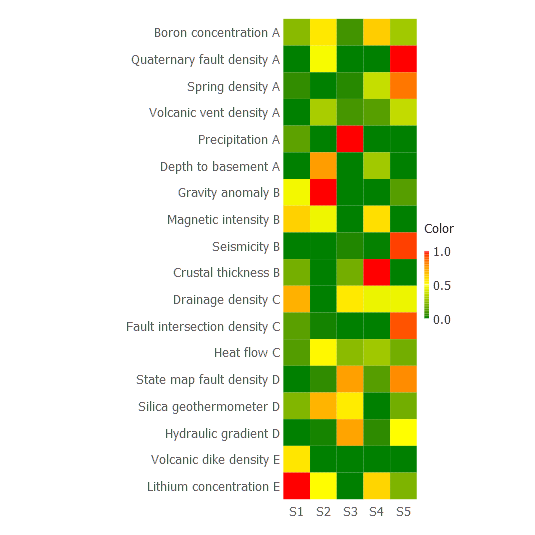

┌ Info: Attributes (signals=5)
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:481
┌ Info: Signal A (S2) Count: 6
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:494
┌ Info: Signal B (S4) Count: 4
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:494
┌ Info: Signal C (S5) Count: 3
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:494
┌ Info: Signal D (S3) Count: 3
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:494
┌ Info: Signal E (S1) Count: 2
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:494
┌ Info: Signal E -> A Count: 2
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:504
┌ Info: Signal A -> B Count: 6
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:504
┌ Info: Signal B -> C Count: 4
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:504
┌ Info: Signal C -> D Count: 3
└ @ NMFk C:\Users\monty\.julia\dev\NMFk\src\NMFkPostprocess.jl:504
┌ Info: Signal D -> 

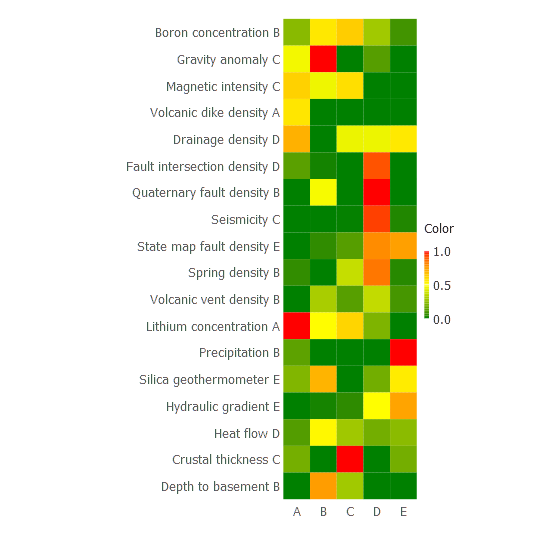

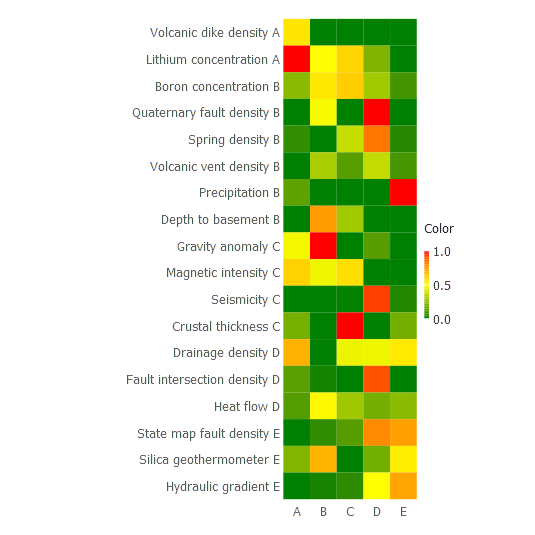

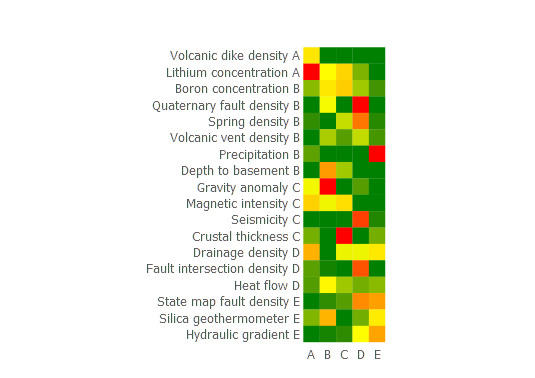

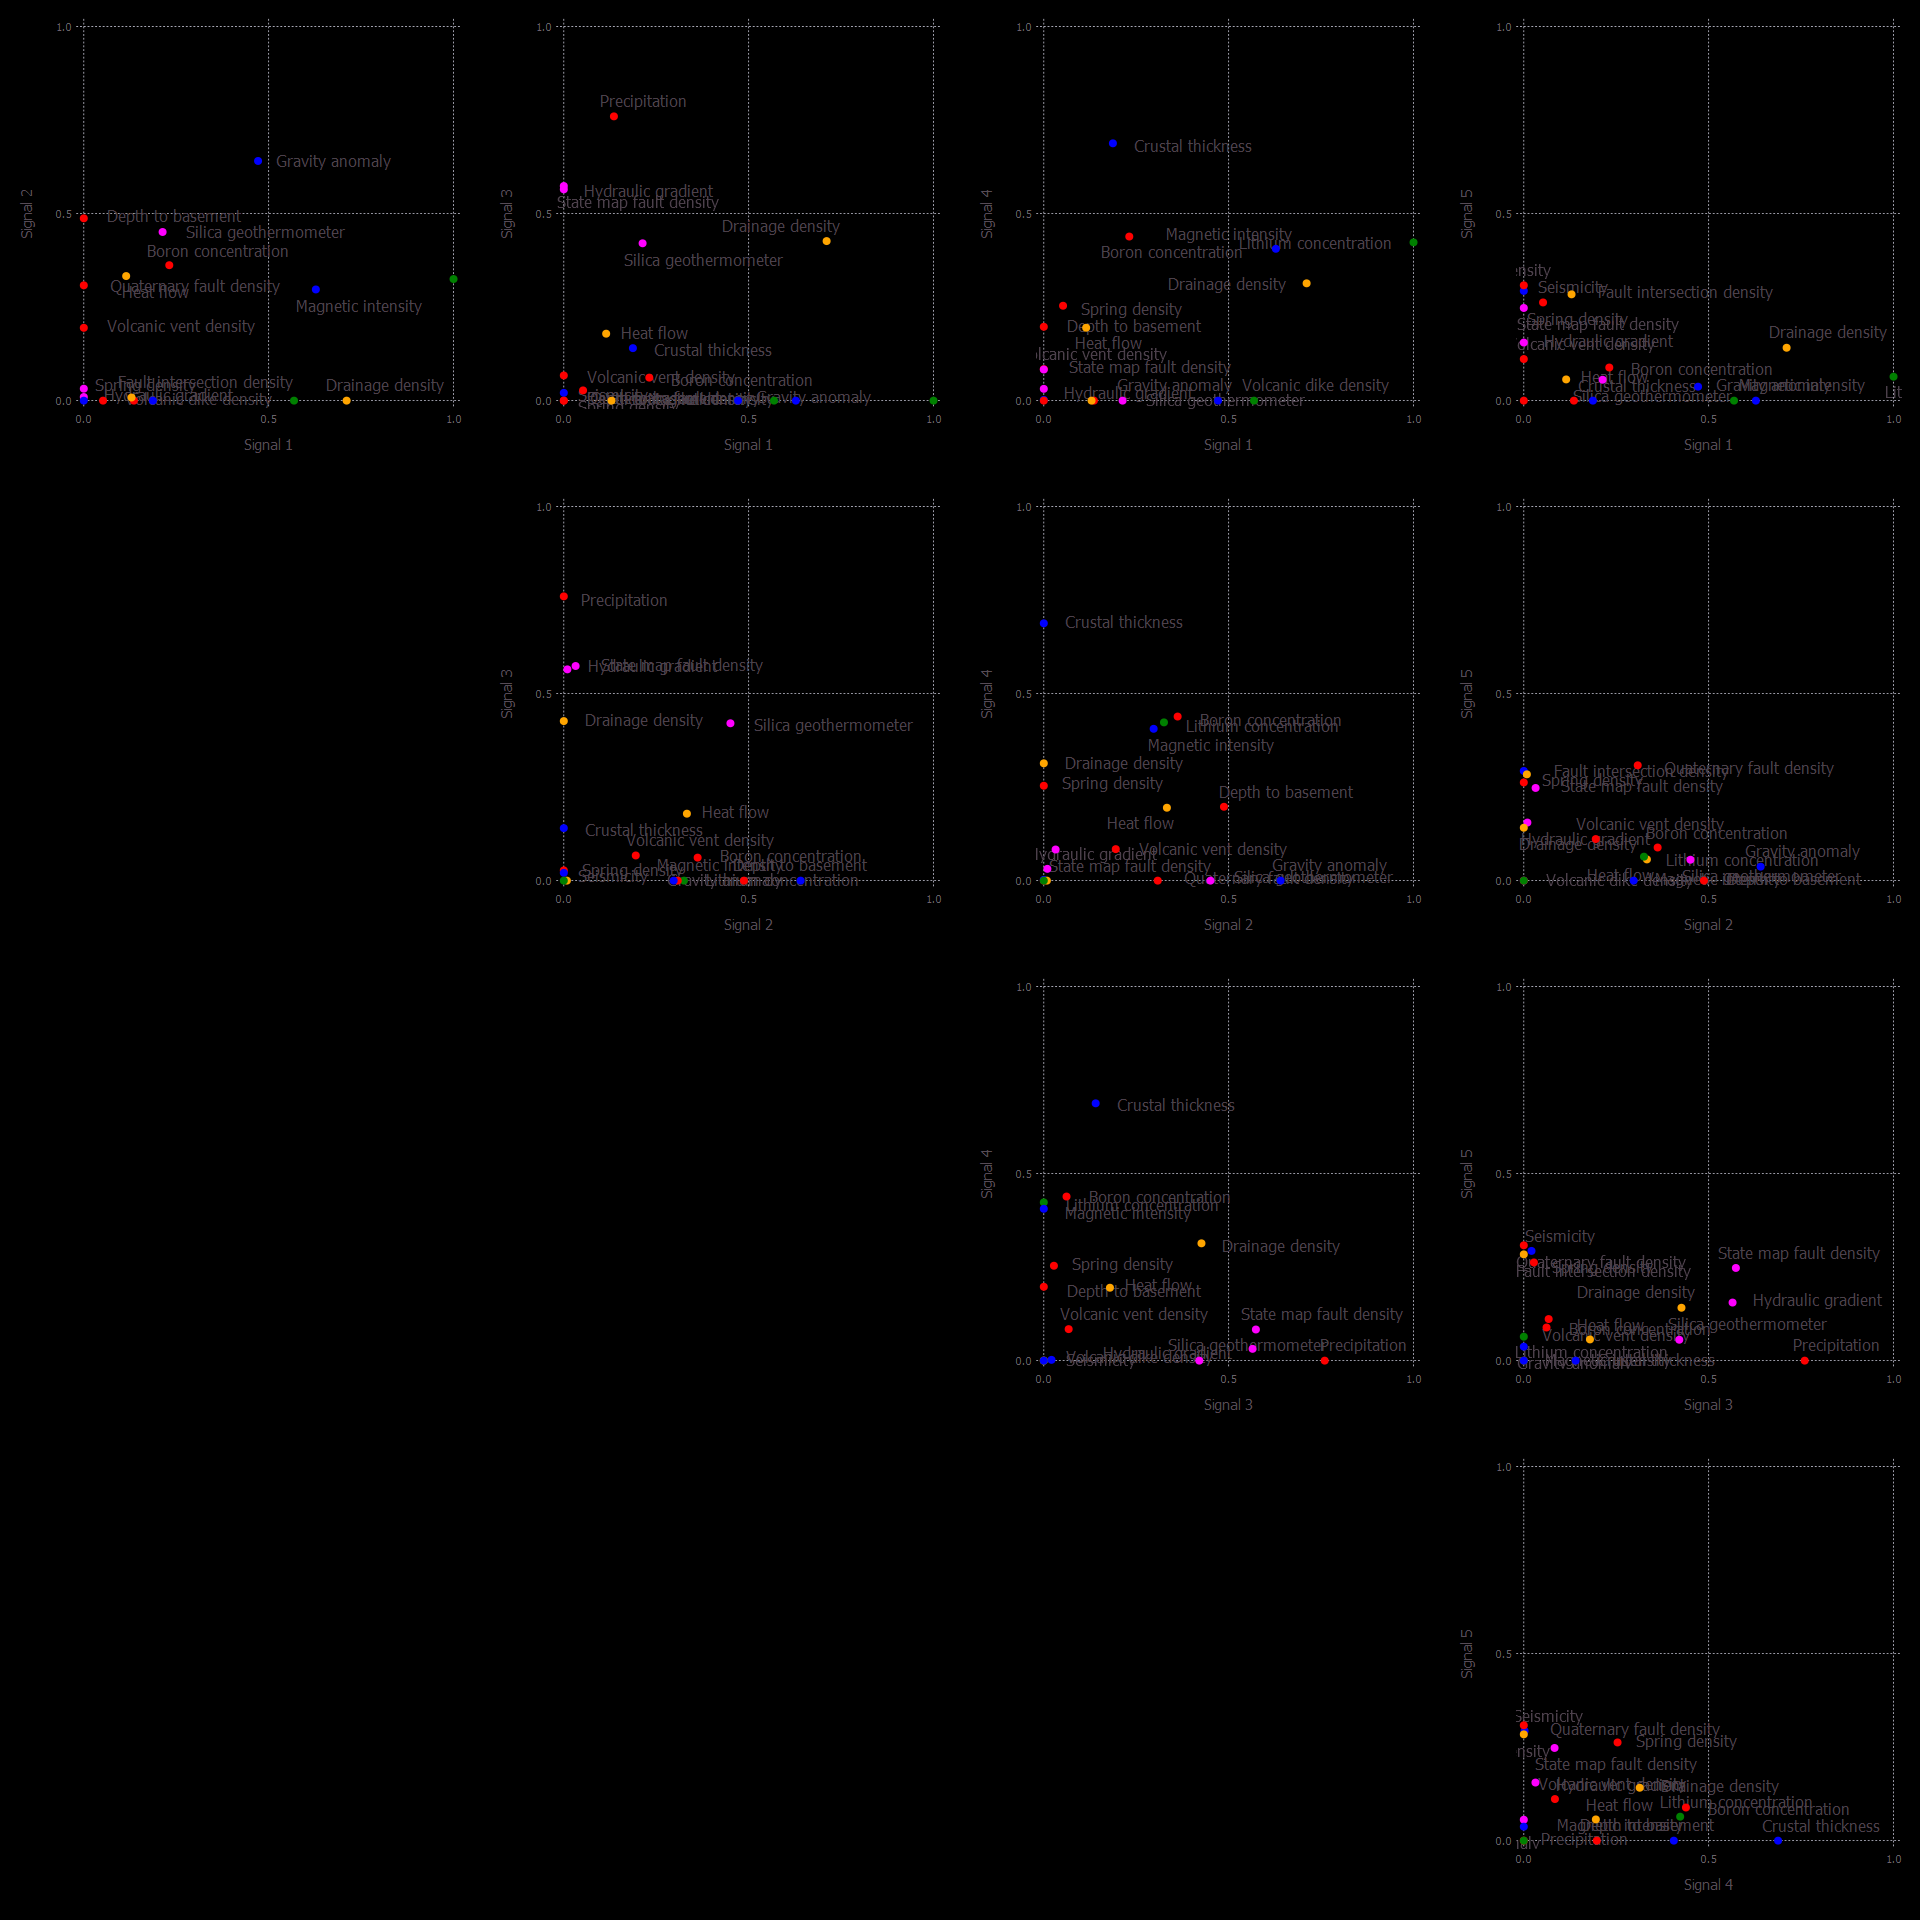

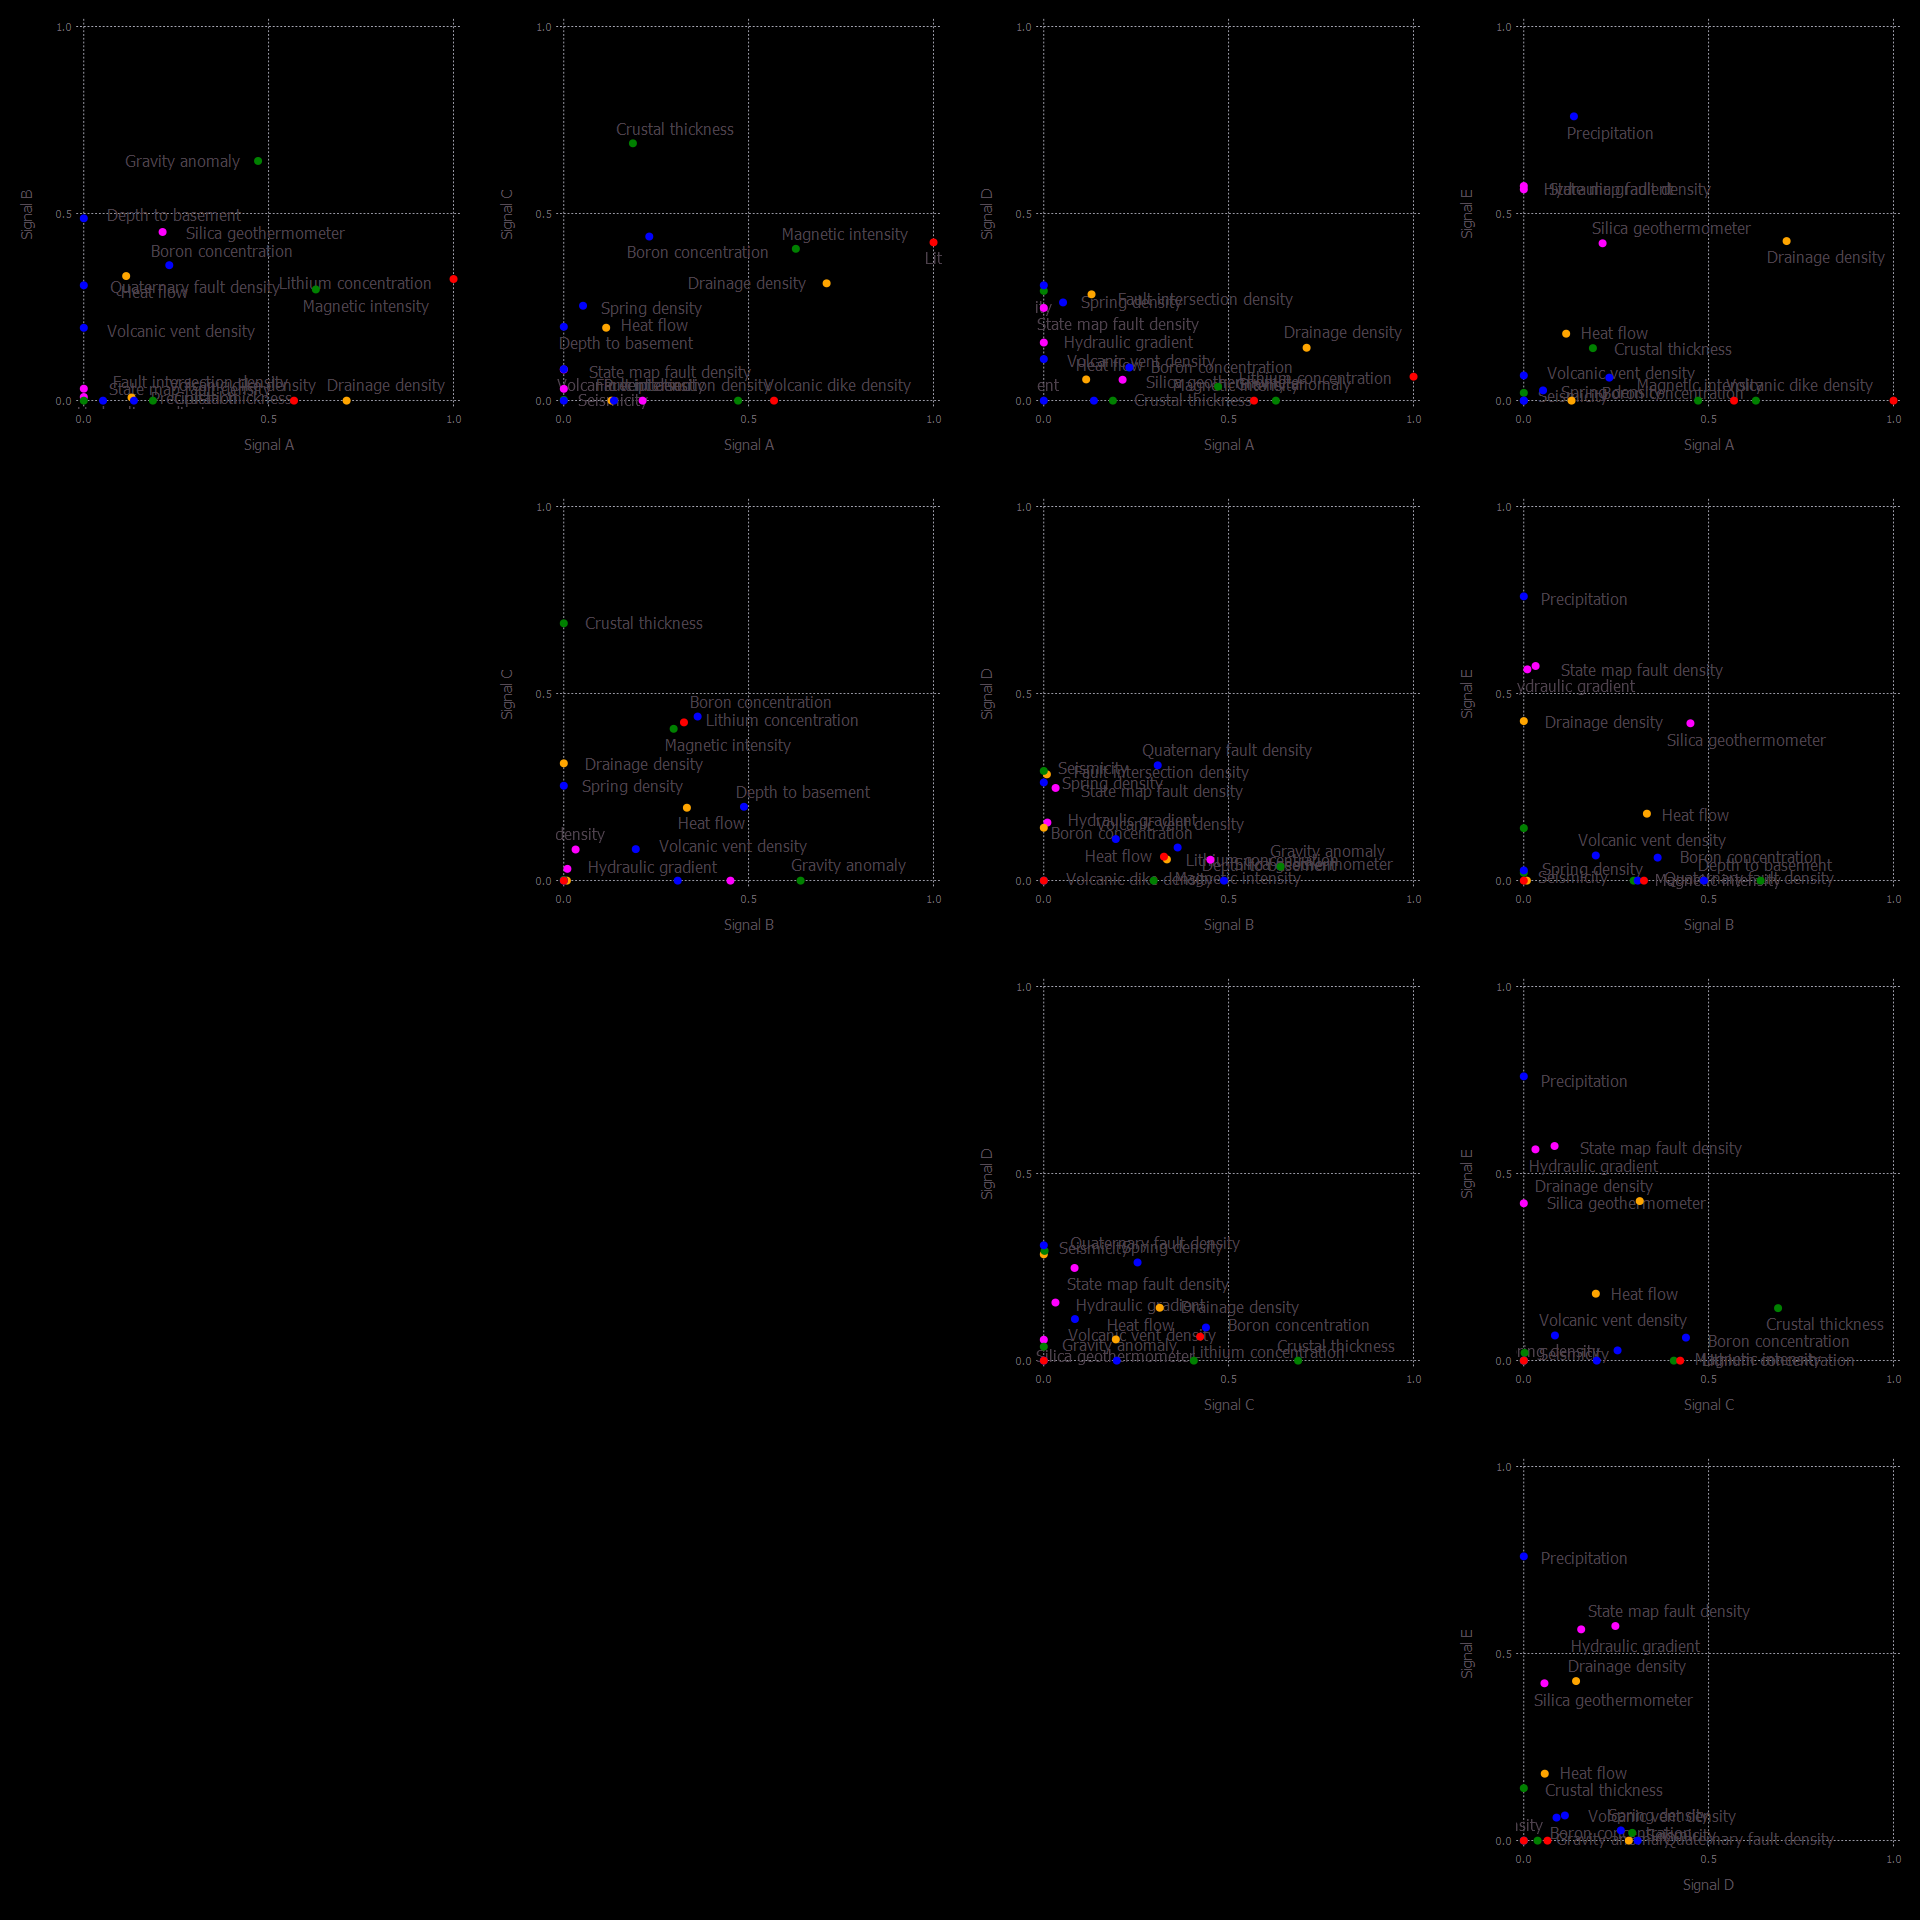

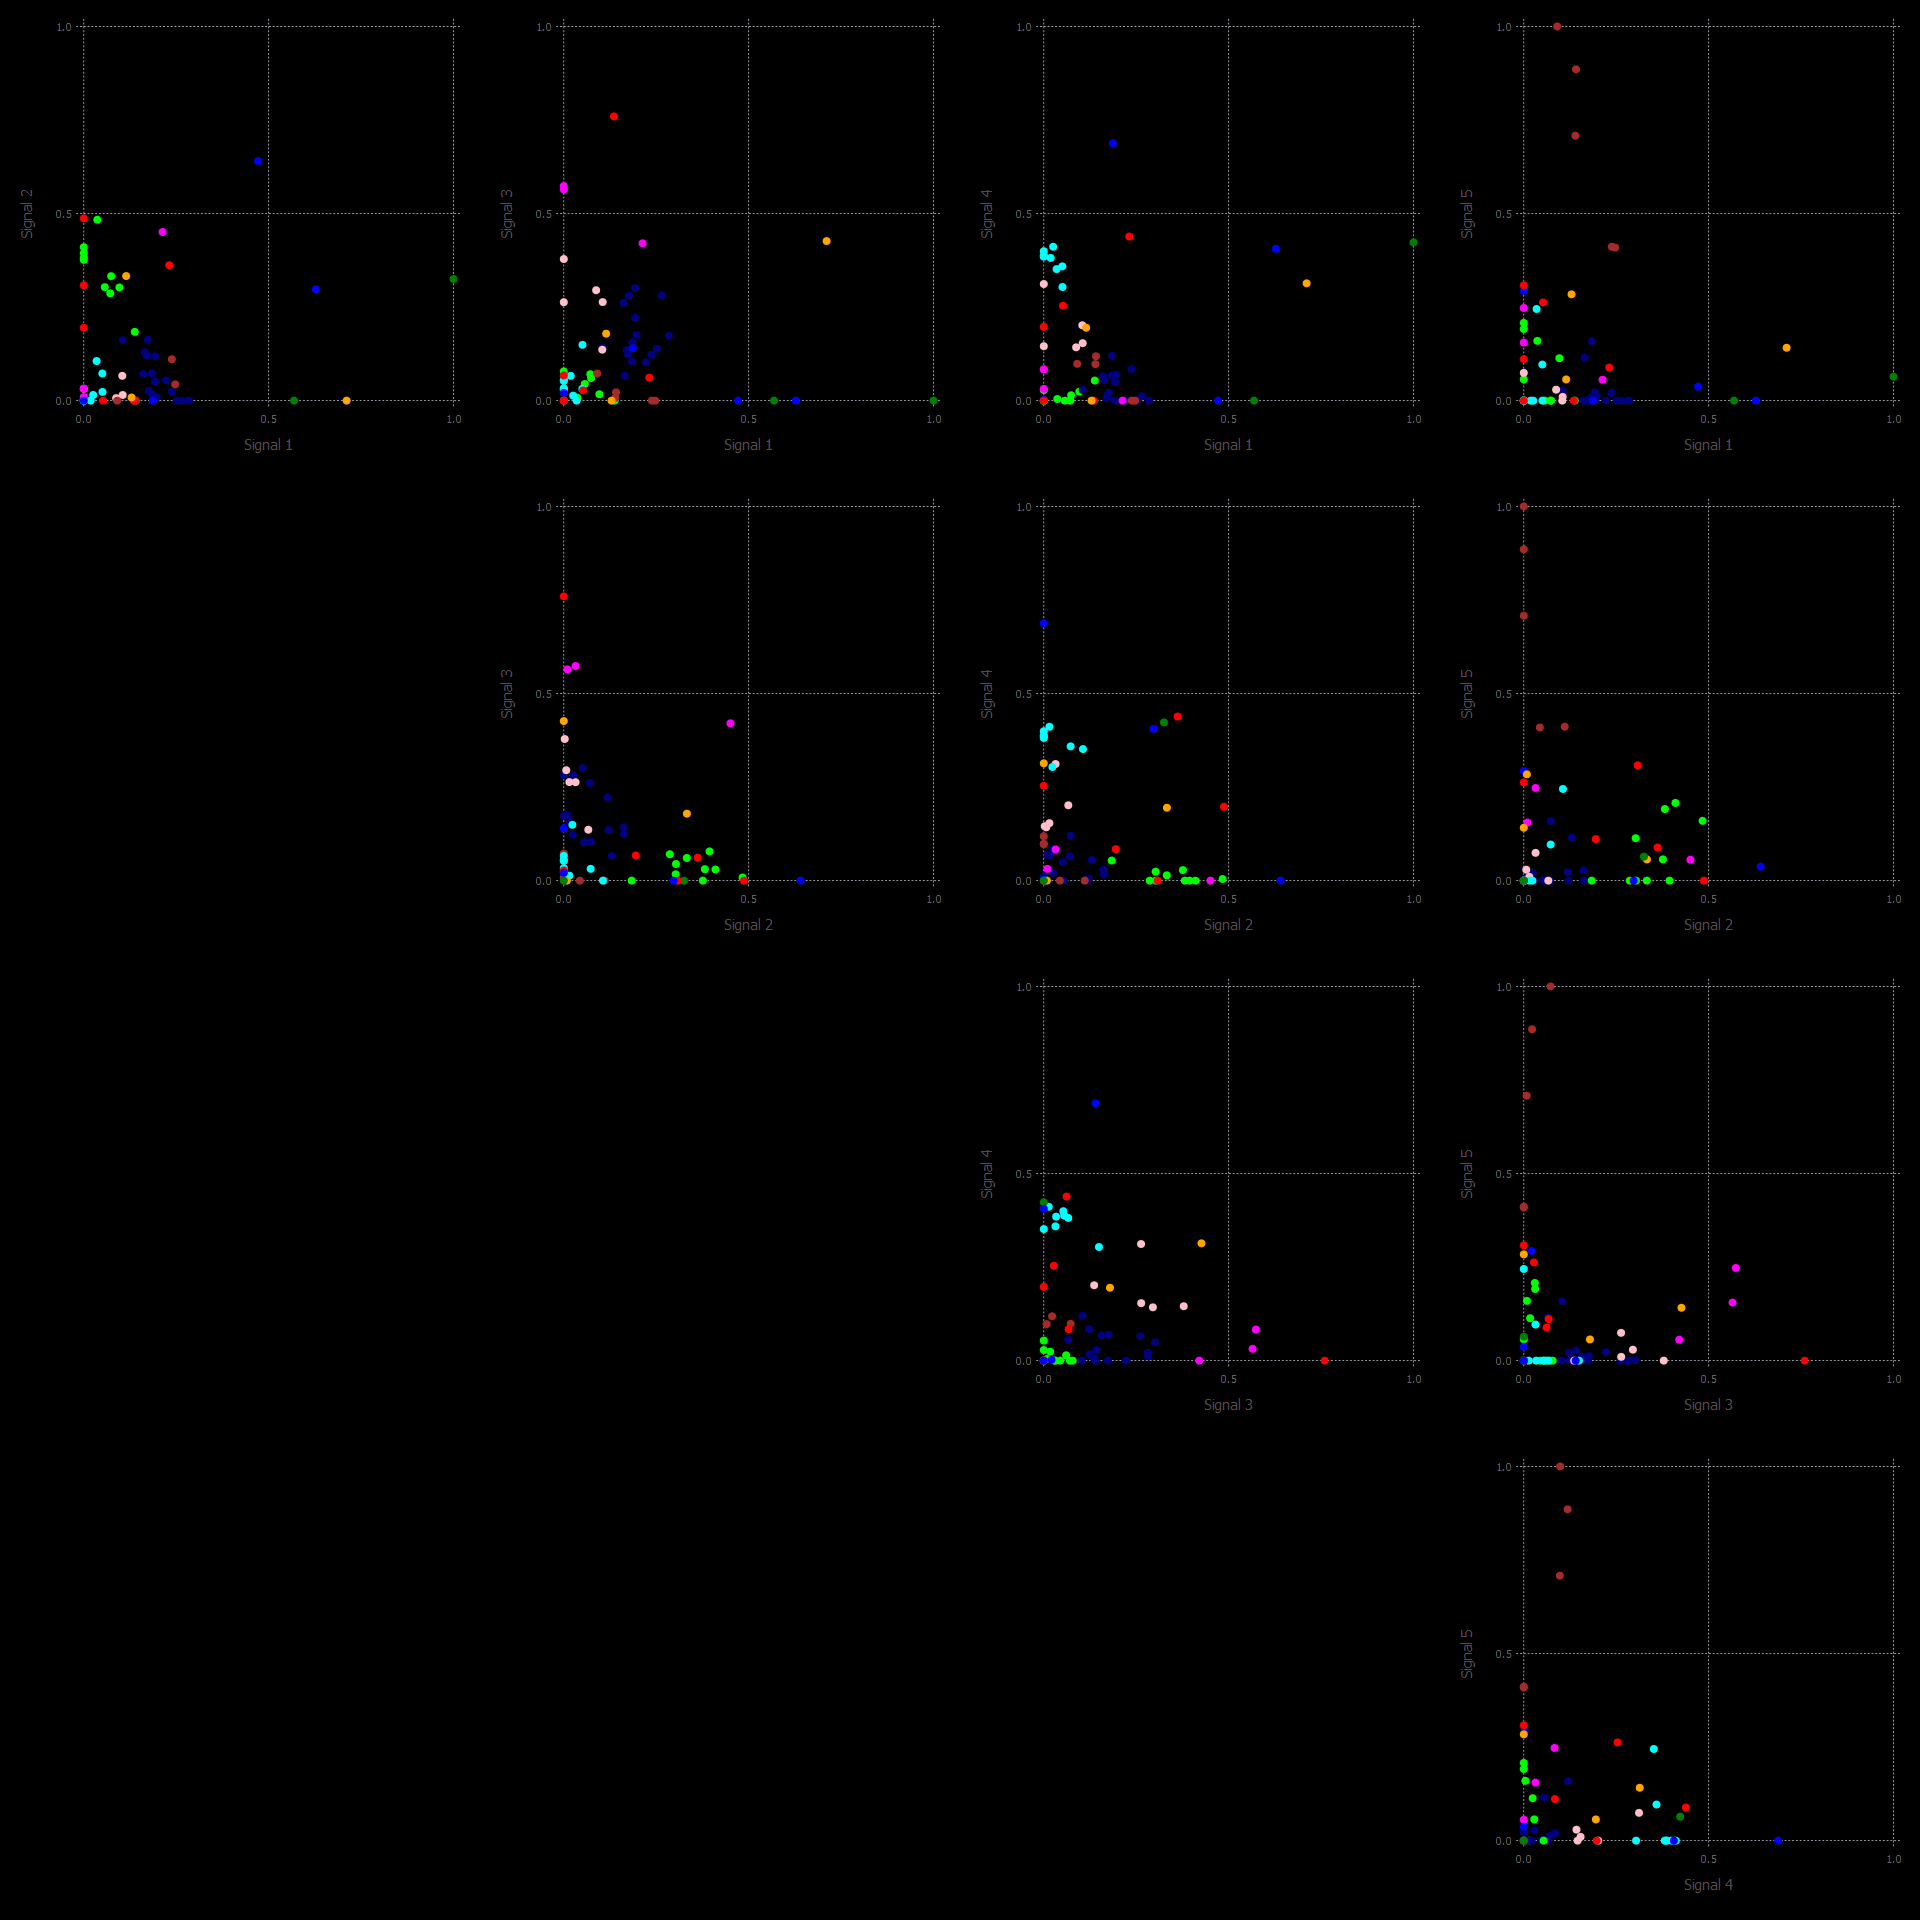

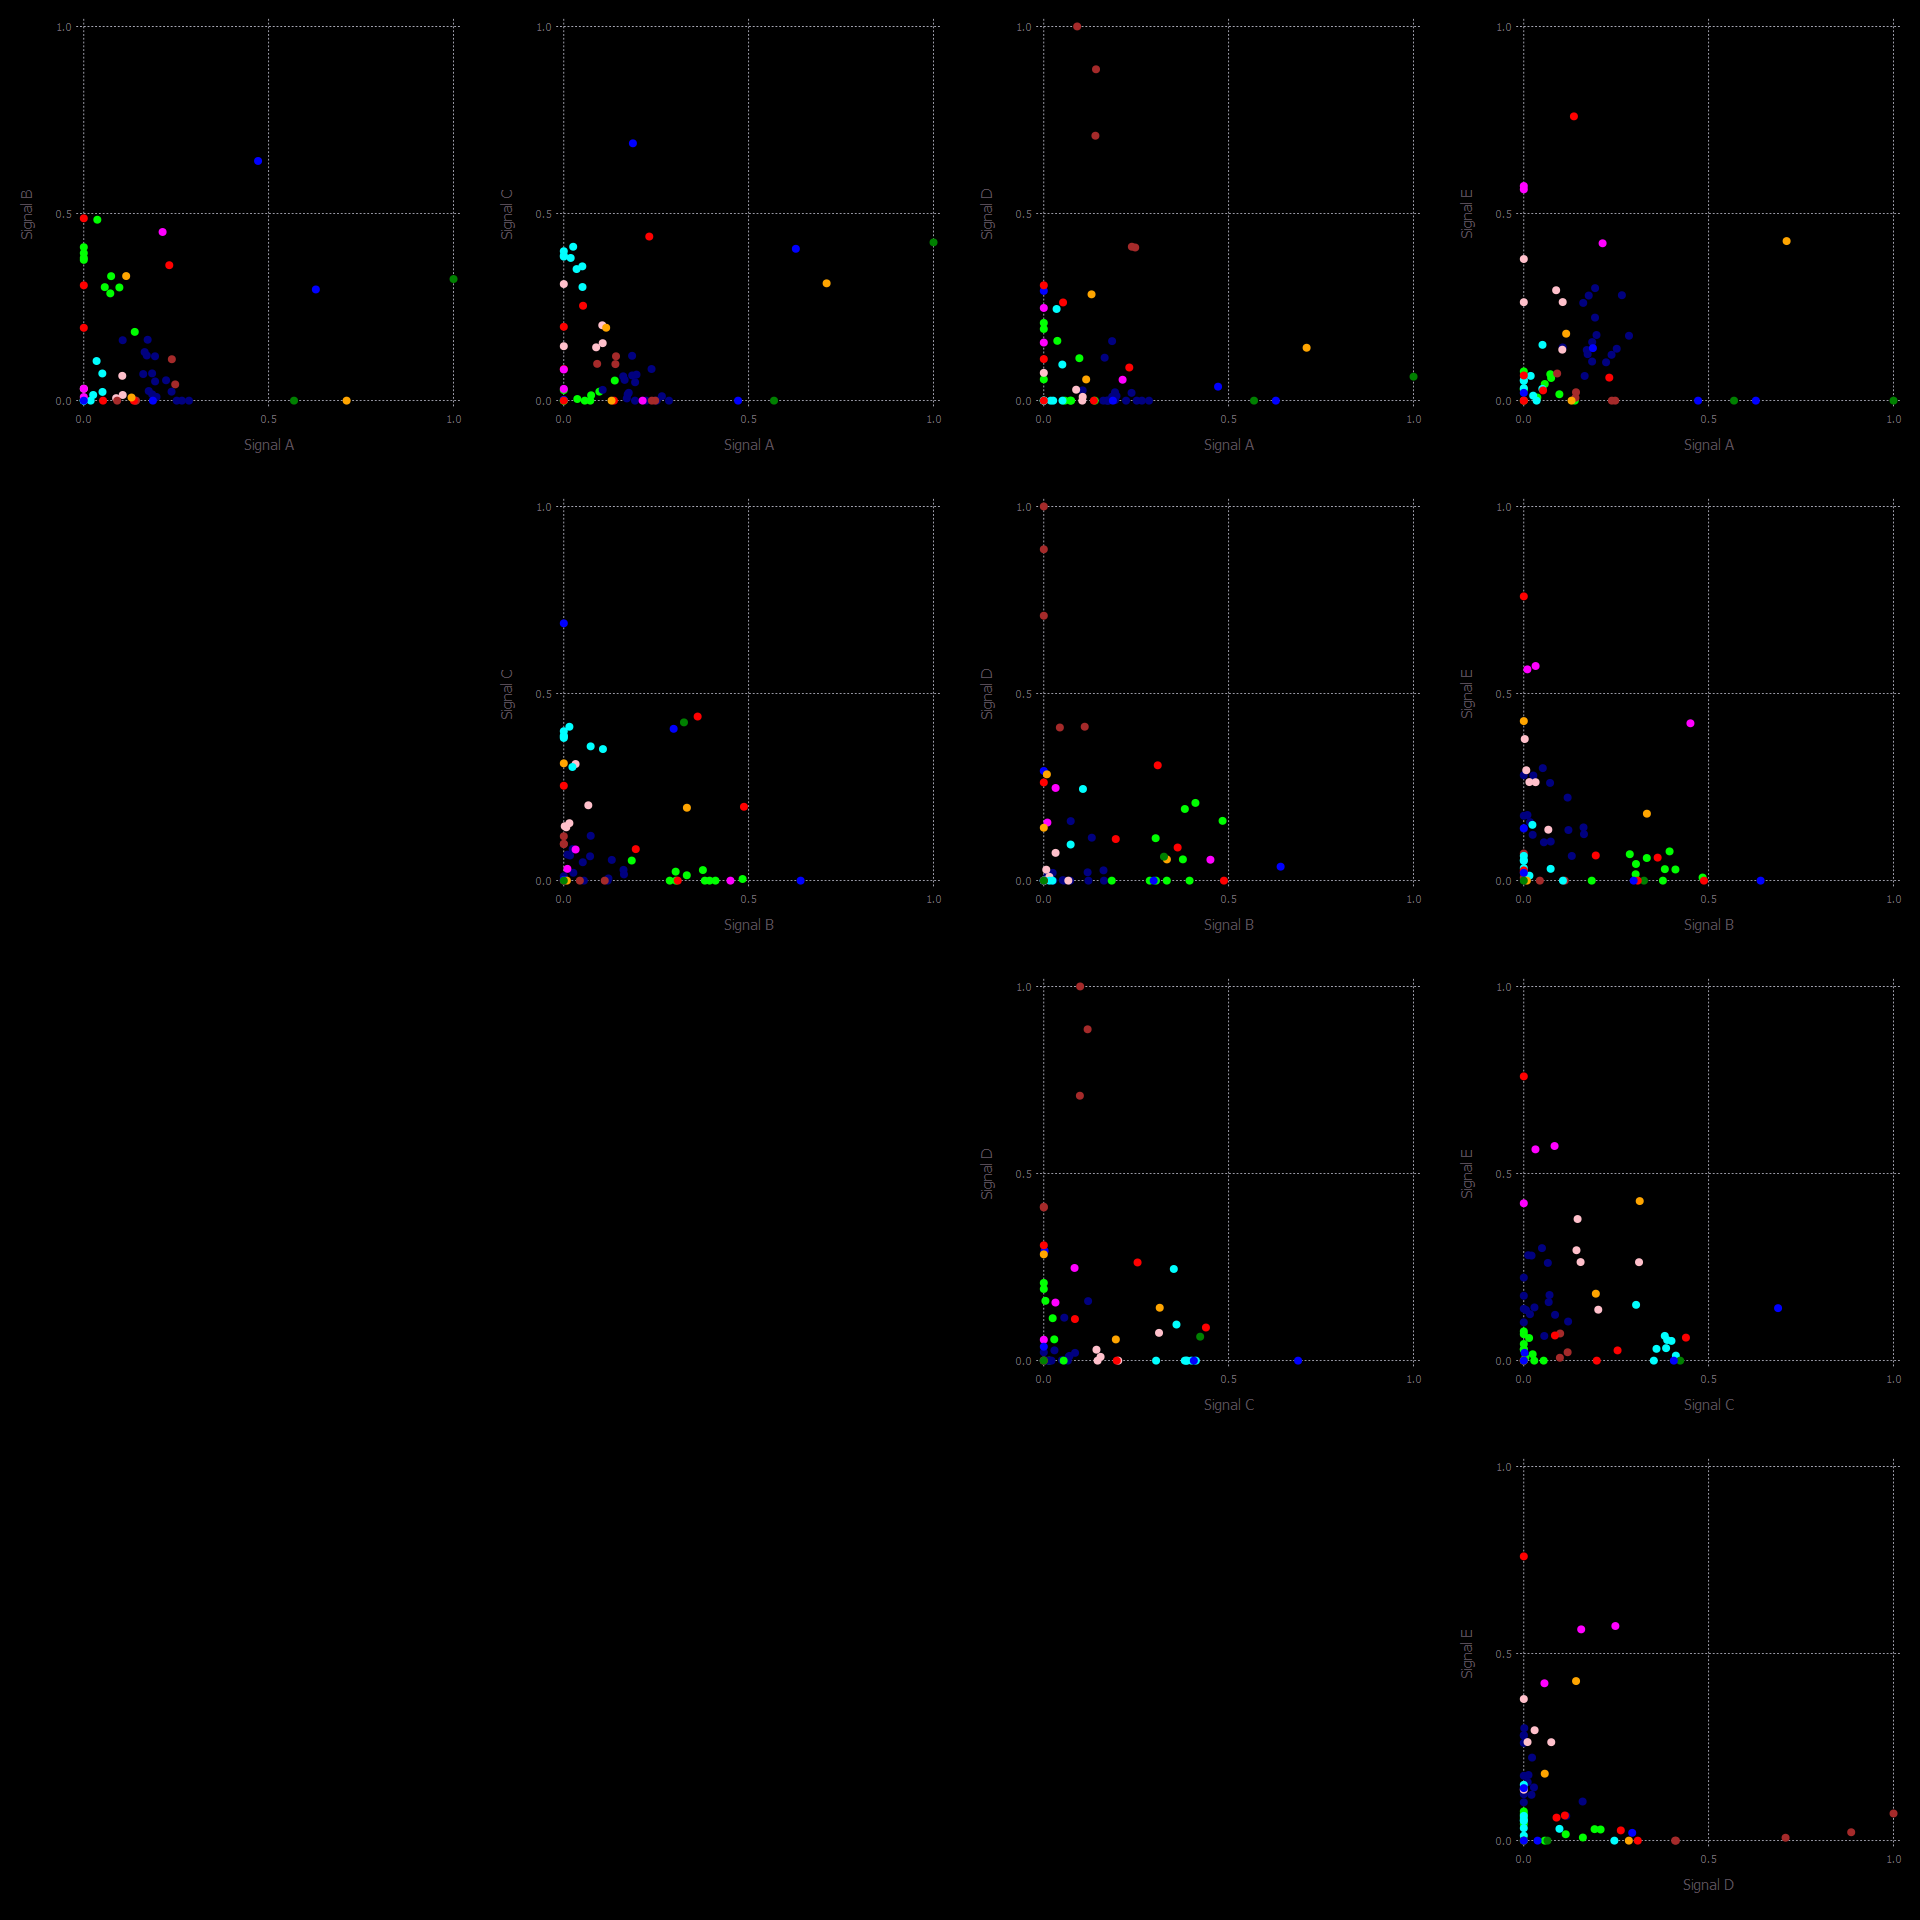

In [16]:
NMFk.clusterresults(NMFk.getks(nkrange, robustness[nkrange]), W, H, attributes, locations; lat=lat, lon=lon, resultdir=resultdir, figuredir=figuredir, ordersignal=:Hcount, Hcasefilename="locations", Wcasefilename="attributes");

#### Analysis of the 5-signature solution

The results for a solution with **5** signatures presented above will be further discussed here.

The geothermal attributes are clustered into **5** groups:


In [17]:
Mads.display("results-case01/attributes-5-groups.txt")

Signal A
Lithium concentration     	1.0
Volcanic dike density     	0.569

Signal B
Depth to basement         	0.761
Boron concentration       	0.565
Quaternary fault density  	0.481
Volcanic vent density     	0.304
Spring density            	0.0
Precipitation             	0.0

Signal C
Crustal thickness         	1.0
Magnetic intensity        	0.59
Seismicity                	0.00309
Gravity anomaly           	0.0

Signal D
Fault intersection density	0.922
Drainage density          	0.459
Heat flow                 	0.184

Signal E
State map fault density   	0.755
Hydraulic gradient        	0.743
Silica geothermometer     	0.554



This grouping is based on analyses of the attribute matrix `W`:

![attributes-5-labeled-sorted](../figures-case01/attributes-5-labeled-sorted.png)

The well locations are also clustered into **5** groups:

In [18]:
Mads.display("results-case01/locations-5-groups.txt")

Signal A (S1)
Ash spr       	1.0
Allen spr     	0.932
Mangas spr    	0.883
Riverside well	0.834
Apache well   	0.782
Spring Can    	0.691
Turkey spr    	0.678
Spring        	0.677
Cliff spr     	0.65
Warm spr      	0.649
Garton well   	0.617
Faywood spr   	0.607
Kennecott well	0.599
Derry spr     	0.578


Mimbres spr   	0.565
Goat spr      	0.37

Signal B (S2)
Fed H1 well   	1.0
Well 4        	0.848
Los Alturas   	0.815
Well 2        	0.789
Well 5        	0.778
Lightning Dock	0.688
Carne well    	0.627
Radium spr    	0.626
Well 3        	0.593
Victoria well 	0.38

Signal C (S4)
Jerry well    	1.0
Pueblo well   	0.971
Rainbow spr   	0.943
Sacred spr    	0.936
Dent well     	0.927
Alamos spr    	0.873


Laguna Pbl    	0.855
Well 1        	0.738

Signal D (S5)
Socorro Can   	1.0
Ojitos spr    	0.885
Ojo Canas     	0.708
T or C spr    	0.411
B.Iorio well  	0.409

Signal E (S3)
Freiborn spr  	1.0
Gila spr 1    	0.78
Gila spr 2    	0.696
Aragon spr    	0.695
Ojo Caliente  	0.36


This grouping is based on analyses of the location matrix `H`:

![locations-5-labeled-sorted](../figures-case01/locations-5-labeled-sorted.png)

The map [../figures-case01/locations-5-map.html](../figures-case01/locations-5-map.html) provides interactive visualization of the extracted location groups (the html file can also be opened within any browser).

#### Comparison of the ML solutions against the SWNM physiographic provinces

The spatial association of the extracted signatures with the four physiographic provinces in SWNM is summarized in the figure below:

![signatures](../figures-case01/signatures.png)

The solutions for k=2, 3, and 4 provide a higher-level classification of the geothermal locations, while the k=8 solution allow us to further refine the geothermal signatures and their association to the physiographic provinces.
The solution for k=5 provides the best classification of the geothermal locations.

Based on the figure above, it is clear that our ML algorithm was able to blindly identify the physiographic provinces associated with analyzed hydrogeothermal systems without providing any information about their spatial location (coordinates). 

Further observations based on the figure above are:

- The solution for k=2 separates the Colorado Plateau and the Volcanic Field (Signature A) from the Basin and Range and the Rift zone (Signature B) provinces (Figure a). 
- The k=3 solution combines the Colorado Plateau and the Volcanic Field in Signature A; however, Signatures B and C separate the Basin and Range and the Rio Grande Rift provinces, respectively (Figure b). 
- Signature A of the k=4 solution (Figure c) represents the Volcanic Field. Signature B captures the Basin and Range province. Signature C coincides with the Colorado Plateau. Signature D encompasses the Rio Grande Rift zone (Figure c). 
- The k=5 solution (Figure d) regroups the four signatures of the k=4 solution into five signatures. Signatures A and E cover MDVF; Signatures B, C, and D capture the remaining three provinces: the Basin and Range, the Colorado Plateau, and the Rio Grande Rift provinces, respectively. 
- In the k=8 solution (Figure e), Signature B captures the Colorado Plateau province. Signatures G and H encompass two separate areas in the Rio Grande Rift zone (Figure e). Three of the signatures (A, C, D) are associated with the Volcanic Field capture spatial variability within this province. Two signatures (E and F) represent the spatial variability in the Basin and Range province.

#### Description of location matrices (`W`)

The plot below shows location matrices (`W`) of the extracted signatures for all the accepted solutions together.
From left to right, the number of signatures increases.
The matrices are color-coded to show high (red) and low (green) associations between the locations and signatures.
Like the maps above, this figure below demonstrates how the signatures get transformed and modified as the number of signatures increases.
The transitions of the signatures show the consistencies of the obtained results.

![Ws](../figures-case01/locations.png)

Further observations based on the figure above are (note that these observations are consistent with the observations provided above regarding the physiographic provinces):

- The k=2 solution subdivides the SWNM into two subregions. 
- Signatures A and B of the k=3 solution are split up into Signatures A, B, and C of the k=4 solution; however, Signature C of the k=3 solution and Signature D of the k=4 solution share very similar properties. 
- Signatures A, B, C, and D of both the k=4 and 5 solutions possess similar properties; however, the k=5 solution got a completely new signature (Signature E). 
- The k=8 solution regrouped the signatures of the k=5 solution. Signature A of the k=5 solution possesses similar properties to Signatures A and D of the k=8 solution. Signature B of the k=5 solution shares similar properties to Signatures E and F of the k=8 solution. Signature C of the k=5 solution has similar properties to both Signatures B and C of the k=8 solution. Signature D of the k=5 solution and both Signatures G and H of the k=8 solution share similar properties. 
- It is critical to mention that although the 44 locations in the `W` matrices are labeled to be associated with a given geothermal signature (i.e., a certain region; A, B, etc.), it does not mean the locations are associated with only one signature as seen by the color-coding in the figure. 
- Instead, it means that those locations predominantly dominate commensurate signatures with contributions from other signatures too.

#### Description of attribute matrices (`H`)

The plot below shows attribute matrices of all the accepted solutions.
The number of signatures increases from left to right.
The figure demonstrates how each attribute contributes to the extracted signature.
The matrices are color-coded to show high (red) and low (green) associations between the attributes and signatures.
Also, this plot shows how the signatures get transformed and modified as the number of signatures increases. 
As above, the transitions of the signatures show the consistencies of the obtained ML results.

![Hs](../figures-case01/signals.png)

Further observations based on the figure above are:

- Signatures A, B, and C of the k=3 solution have similar properties to Signatures A, B, and both C and D of the k=4 solution, respectively. 
- Signatures of A, B, C, and D of the k=4 solution possess similar properties to signatures both A and E, B, C, and D of the k=5 solution, respectively. 
- Signatures A, B, C, D, and E of the k=5 solution share similar properties to both A and E, F, B, both G and H, and both C and D of the k=8 solution, respectively.

#### Optimal geothermal signatures charecterizing SWNM region

The figure below shows the map of the optimal signatures.
The k=5 solution best characterizes the spatial associations and geothermal attributes of the SWNM. 

![Ws](../figures-case01/nmfk5.png)

#### Signatures and their relationships to resource types, geothermal attributes, physical processes and physiographic provinces

|Signature|Resource type|Dominant attributes|Physical Significance|Physiographci province|
|---|----|----|----|----|
|A|Low temperature|<p> Gravity anomaly <br> Magnetic intensity <br> Volcanic dike density <br> Drainage density <br> Li+ concentration <p>|Shallow heat flow|Southern MDVF|
|B|Medium temperature|<p>B+ and Li+ concentrations <br> Gravity anomaly <br> Magnetic intensity <br> Quaternary fault density <br> Silica geothermometer <br> Heat flow <br> Depth to the basement <p>|Deep heat flow|Southern Rio Grande rift|
|C|Low temperature|<p> B+ and Li+ concentrations <br> Magnetic intensity <br> Drainage density <br> Crustal thickness <p>|Deep heat source|Colorado Plateau|
|D|Low temperature|<p> Drainage density <br> Fault intersection density <br> Seismicity <br> State map fault density <br> Spring density <br> Hydraulic gradient <p>|Tectonics|Northern Rio Grande Rift |
|E|Medium temperature|<p> Drainage density <br> State map fault density <br> Precipitation <br> Silica geothermometer <br> Hydraulic gradient <p>|Vertical hydraulics|Northern MDVF|

#### Geothermal resource assessment

- The extracted signatures characterize low- and medium-temperature hydrothermal systems.
- The signatures are characterized by unique geothermal attributes which are automatically identified by our ML analyses.

##### Medium-temperature hydrothermal systems
- Two of the signatures (B and E) represent medium-temperature hydrothermal systems 
- The medium-temperature signatures (B and E) fall in the Southern Rio Grande Rift and the Northern MDVF zones.
    * The dominant attributes of the Southern Rio Grande Rift zone are B+ and Li+ concentrations, Gravity anomaly, Magnetic intensity, Quaternary fault density, Silica geothermometer, Heat flow, Depth to the basement.
    * The dominant attributes of the Northern MDVF are Drainage density, State map fault density, Precipitation, Silica geothermometer, Hydraulic gradient. 


##### Low-temperature hydrothermal systems
- Three of the signatures (A, C, and D) represent low-temperature hydrothermal systems.
- The low-temperature signatures (A, C, and D) fall in the Southern MDVF, Colorado Plateau, and Northern Rio Grande Rift zones.

For more details, please look at our paper titled:  "Discovering Hidden Geothermal Signatures using Unsupervised Machine Learning."